In [1]:
#librarys
import csv
import nltk
from nltk.stem import PorterStemmer
import re
import string
from language_detector import detect_language
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from sklearn.decomposition import LatentDirichletAllocation
import lda

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jedrek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# reading files to arrays


#Companies = ["Deloitte","Ey","Pwc","Accenture","Kpmg-0828bc85"]
#for company in Companies:
Deloitte = []
PwC = []
KPMG = []
Accenture = []
EY = []
Companies = ["Deloitte","Ey","Pwc","Accenture","Kpmg-0828bc85"]
i = 0
for company in Companies:
  with open(company+'.csv', 'r',encoding='utf-8') as f:
    reader = csv.reader(f,delimiter= '|')
    for row in reader:
      if not row:
        continue
      if company == 'Deloitte':
        Deloitte.append(row[0])
      elif company == 'Ey':
        EY.append(row[0])
      elif company == 'Pwc':
        PwC.append(row[0])
      elif company == 'Kpmg-0828bc85':
        KPMG.append(row[0])
      else:
        Accenture.append(row[0])
  

In [3]:
# Checking number of reviews, and mean lelngth of a review
Reviews_pt_zero = {
    'Deloitte': Deloitte,
    'Accenture': Accenture,
    'EY': EY,
    'PwC':PwC,
    'KPMG': KPMG
}

for key in Reviews_pt_zero:
    print(len(Reviews_pt_zero[key]))

for key in Reviews_pt_zero:
    counter = 0
    length = 0
    for line in Reviews_pt_zero[key]:
        counter += 1
        length += len(line)
    result = int(length/counter)
    print('For company ', key, ' avg: ', result)

770
756
735
716
691
For company  Deloitte  avg:  215
For company  Accenture  avg:  209
For company  EY  avg:  219
For company  PwC  avg:  217
For company  KPMG  avg:  213


In [32]:

# tabela [review1, review2, ..., review731]
stopwords = nltk.corpus.stopwords.words('english')
stopwords_deloitte = ['deloitt', 'lot', 'realli', 'the', 'time', 'get', 'year', 'you', 'like', 'anyth', 
'without', 'within', 'came', 'dont', 'howev', 'thi', 'way', 'your', 'person', 'did', 'real', 'switch',
'feel', 'want', 'take', 'but', 'alway', 'they', 'mani', 'also', 'make', 'would', 'had', 'away', 'ive', 
'one', 'timeconsnot', 'internalextern', 'mexico','prosflex','morn', 'prosbenefit', 'prosfre', 'work',
'it','i','accentur','pwc','kpmg','proswork','prosgood','projectsconswlb','proswid','prosbenefitsconslong']

def preprocessing(compRevs):
    after_preprocess = []
    for review in compRevs:
    # Deleting of non-english reviews
        check = detect_language(review)
        if check != 'English':
            continue

    # Removing punctuation marks
        review = re.sub(r'[^a-zA-Z0-9\s]', '', review)

    # Reemoving numbers
        pattern = r'\d+'
        review = re.sub(pattern, '', review)

    # Removing default Stopwords 
        newreview = ''
        wordsInReview = review.split()
        for word in wordsInReview:
            if word not in stopwords:
                newreview += word + ' '
        review = newreview


    # Lowercasing
        review.lower()

    # Stemming&stripping whiespaces 
        stemmer = PorterStemmer()
        review_words = review.split()
        stemmed_words = []
        for word in review_words:
            stemmed_words.append(stemmer.stem(word))
        review = ' '.join(stemmed_words)
        
    # Removing stopwords after experiments
        newreview = ''
        wordsInReview = review.split()
        for word in wordsInReview:
            if word not in stopwords_deloitte:
                newreview += word + ' '
        review = newreview
        
        after_preprocess.append(review)
    return after_preprocess


KPMG_pre = preprocessing(KPMG)
Deloitte_pre = preprocessing(Deloitte)
PwC_pre = preprocessing(PwC)
Accenture_pre = preprocessing(Accenture)
EY_pre = preprocessing(EY)

Reviews = {
    'Deloitte': Deloitte_pre,
    'Accenture': Accenture_pre,
    'EY': EY_pre,
    'Pwc':PwC_pre,
    'KPMG': KPMG_pre
    }


In [33]:
dtmr = {
    'Deloitte': [],
    'Accenture': [],
    'EY': [],
    'Pwc':[],
    'KPMG': []
    }
dtm = []
# Rename the variable to something else
for key in Reviews:
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(Reviews[key])
  indices = np.where(X.sum(axis=0) > 1)[1]
  words = [vectorizer.get_feature_names()[i] for i in indices if len(vectorizer.get_feature_names()[i]) > 2]
  vectorizer = CountVectorizer(vocabulary=words)
  dtm = vectorizer.fit_transform(Reviews[key])
  dtmr[key] = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())




c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; ge

Deloitte


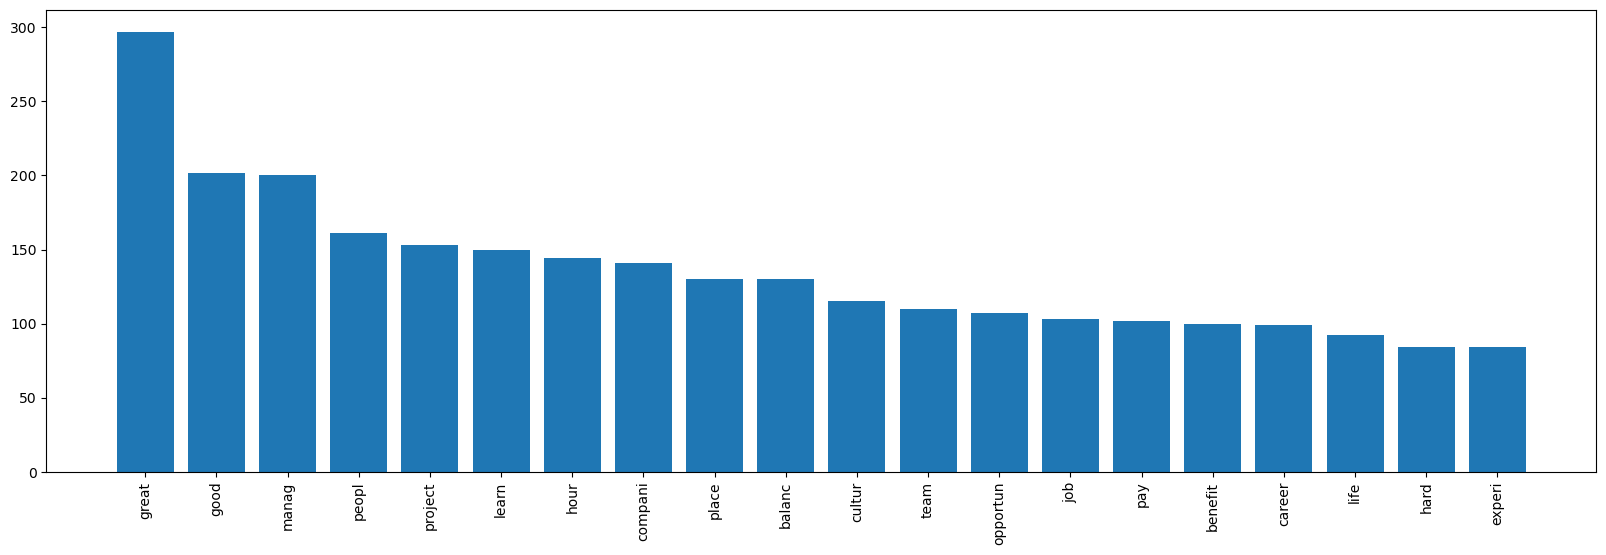

Accenture


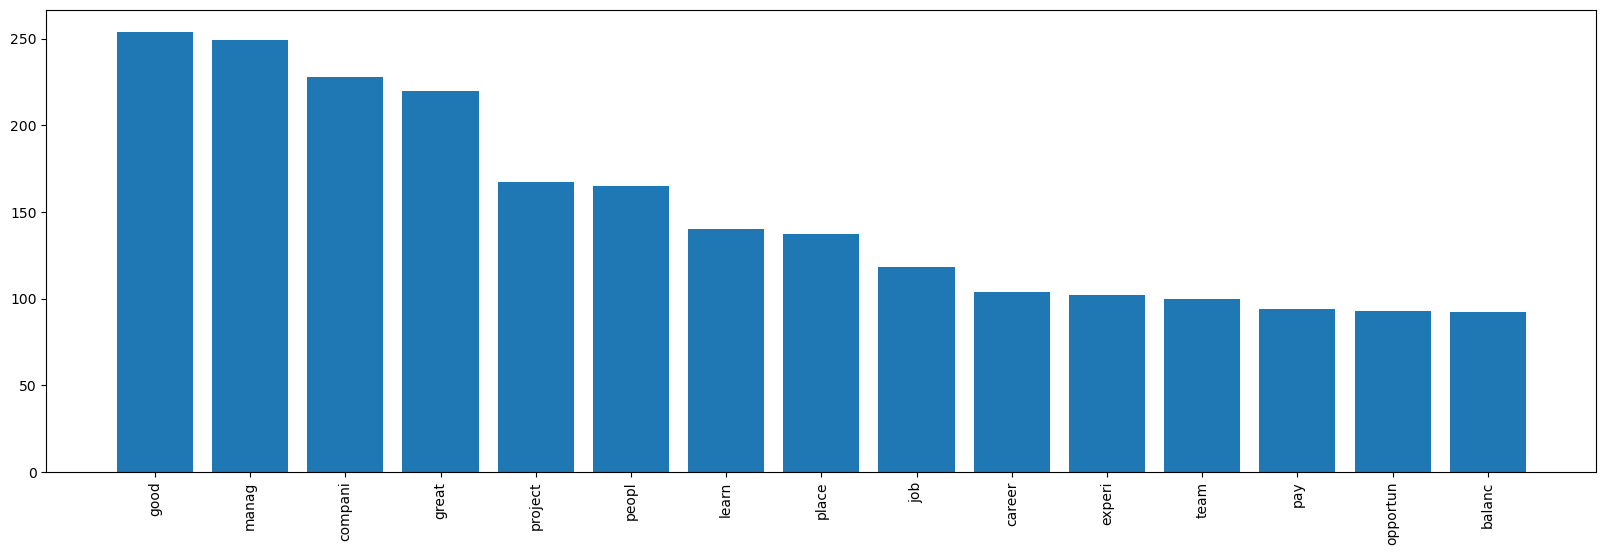

EY


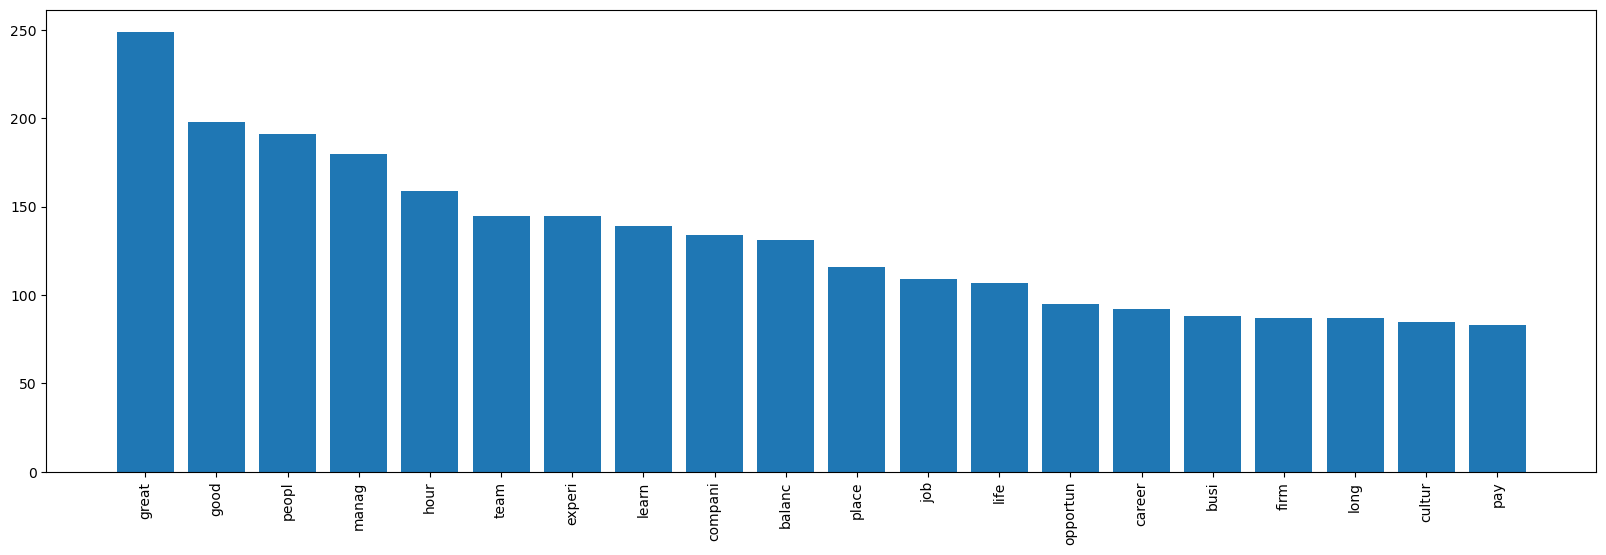

Pwc


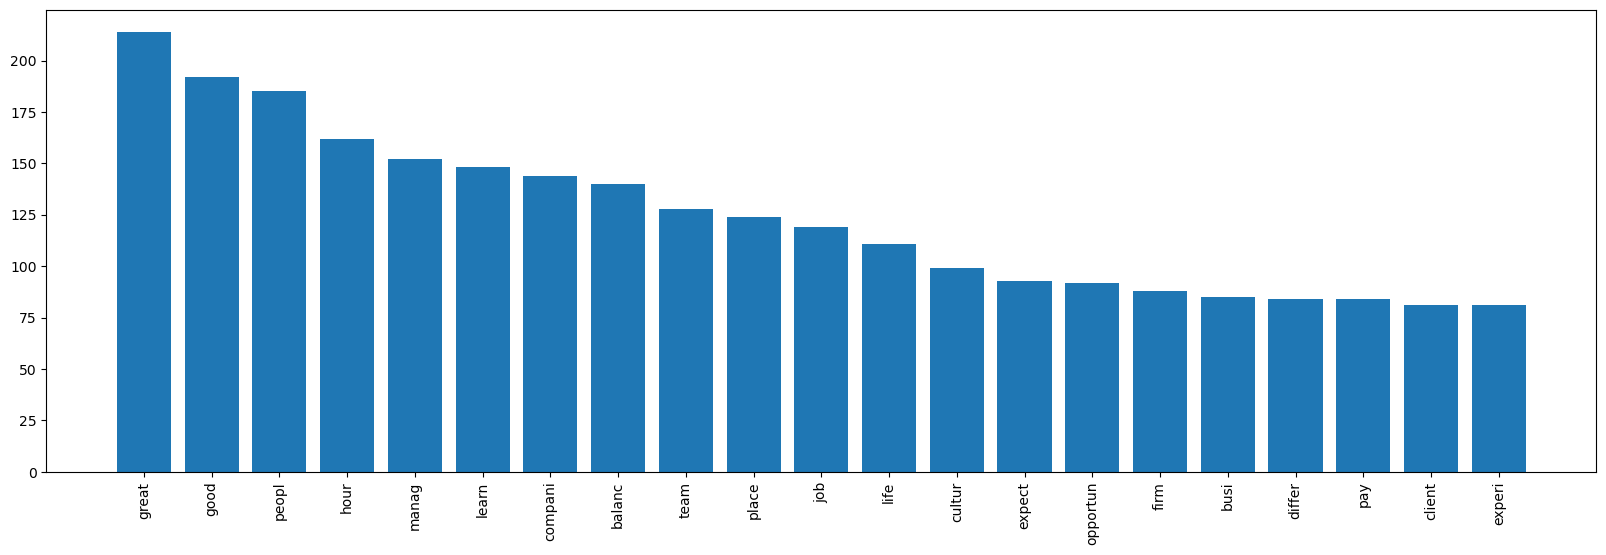

KPMG


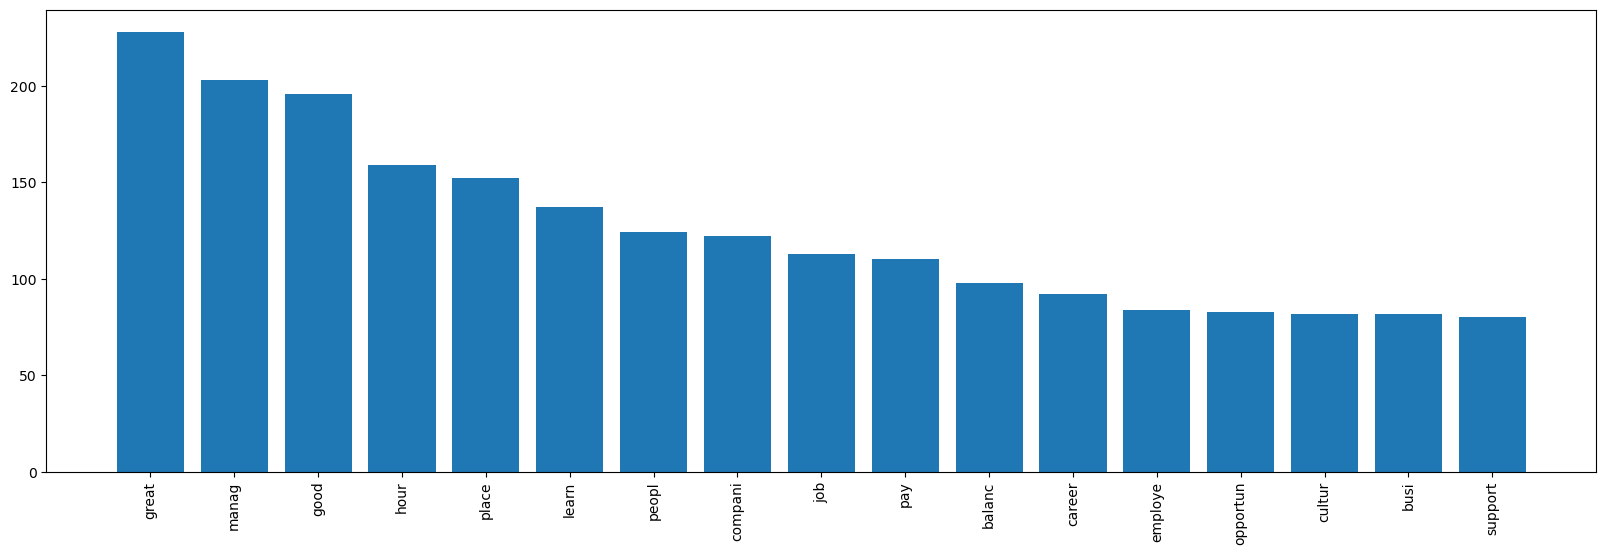

In [6]:
for company in dtmr:
    freqr = dtmr[company].sum(axis=0)
    freqr = freqr.sort_values(ascending=False)
    mask = freqr >= 80
    freqr = freqr.drop(labels=freqr[~mask].index)
    plt.figure(figsize=(20, 6))
    plt.bar(freqr.index, freqr.values)
    plt.xticks(rotation='vertical')
    print(company)
    plt.show()
    


In [8]:
def create_wordcloud(df):
    feature_names = df.columns.tolist()
    frequencies = df.sum(axis=0).tolist()
    
    wordcloud = WordCloud(
        width = 1000,
        height = 1000,
        background_color = 'white',
        min_font_size = 30
    ).generate_from_frequencies(frequencies=dict(zip(feature_names, frequencies)))

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    return


Deloitte


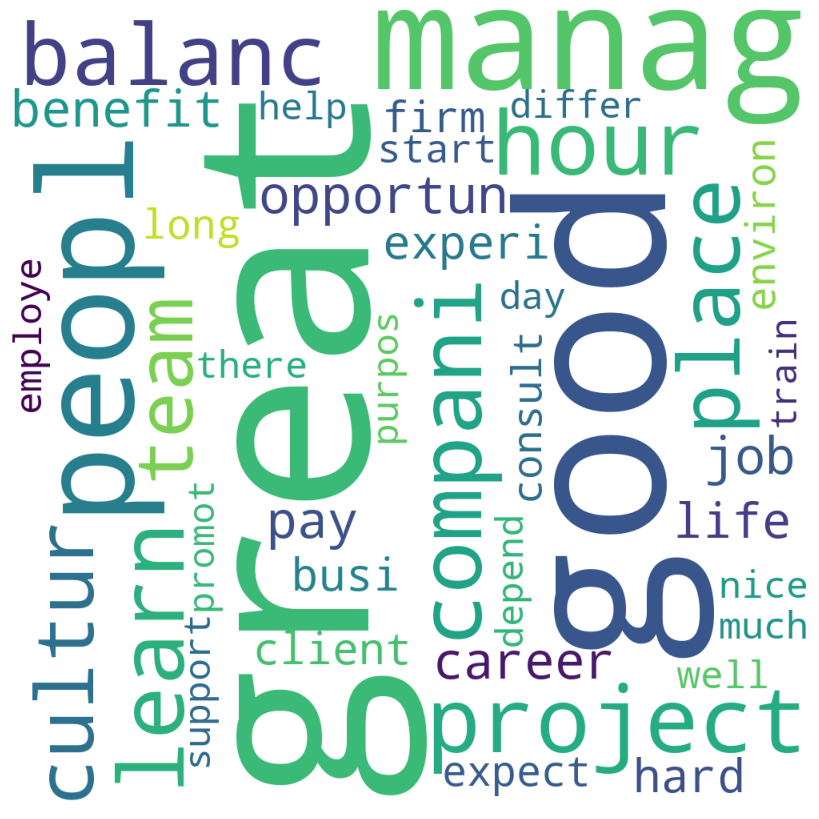

Accenture


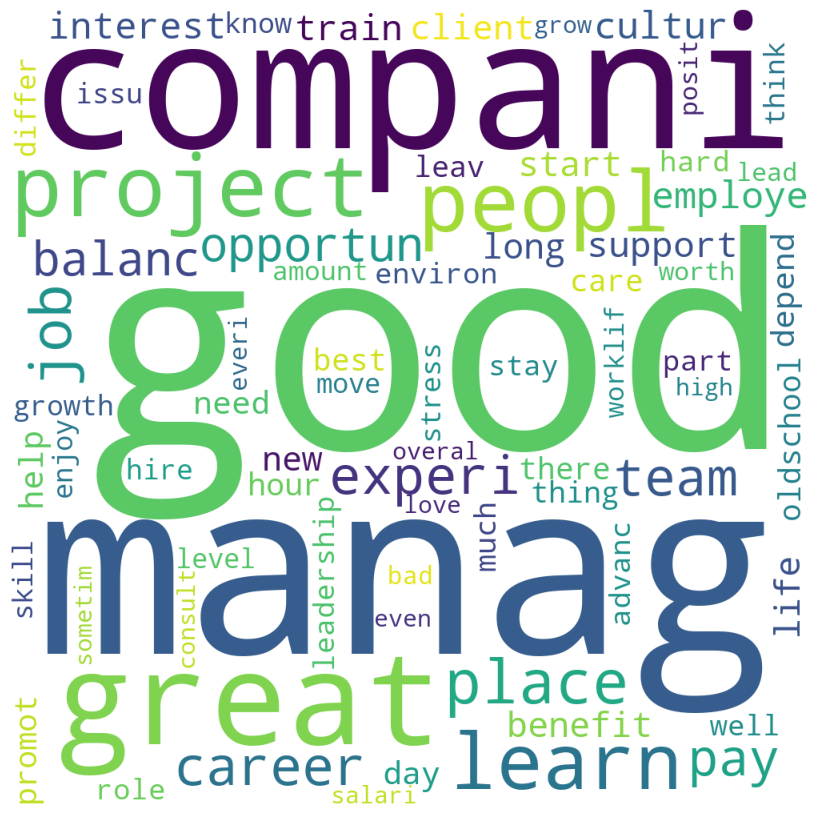

EY


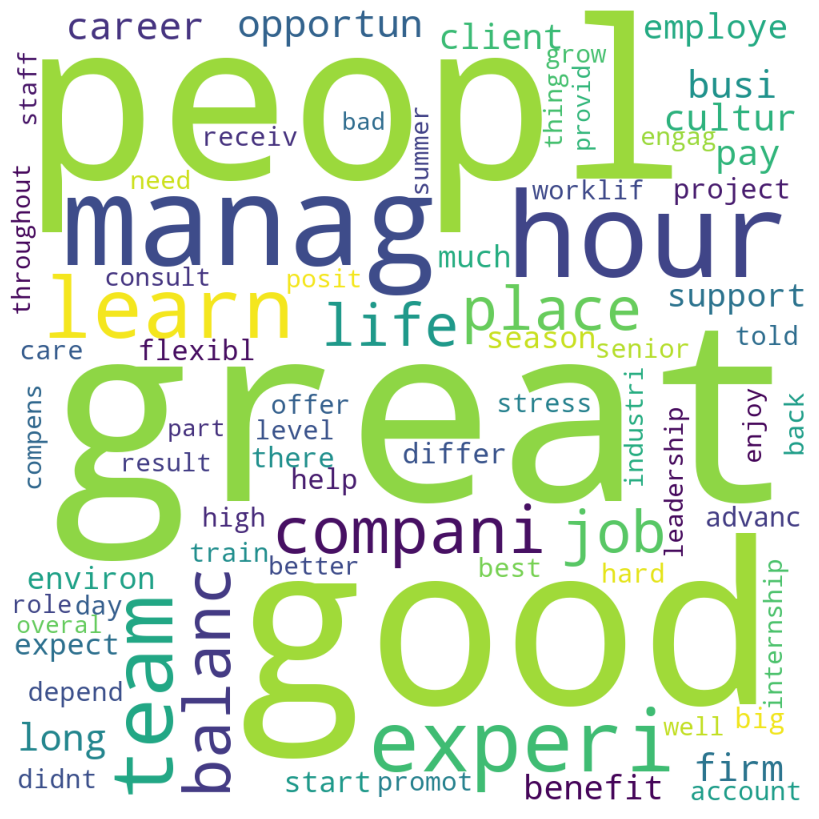

Pwc


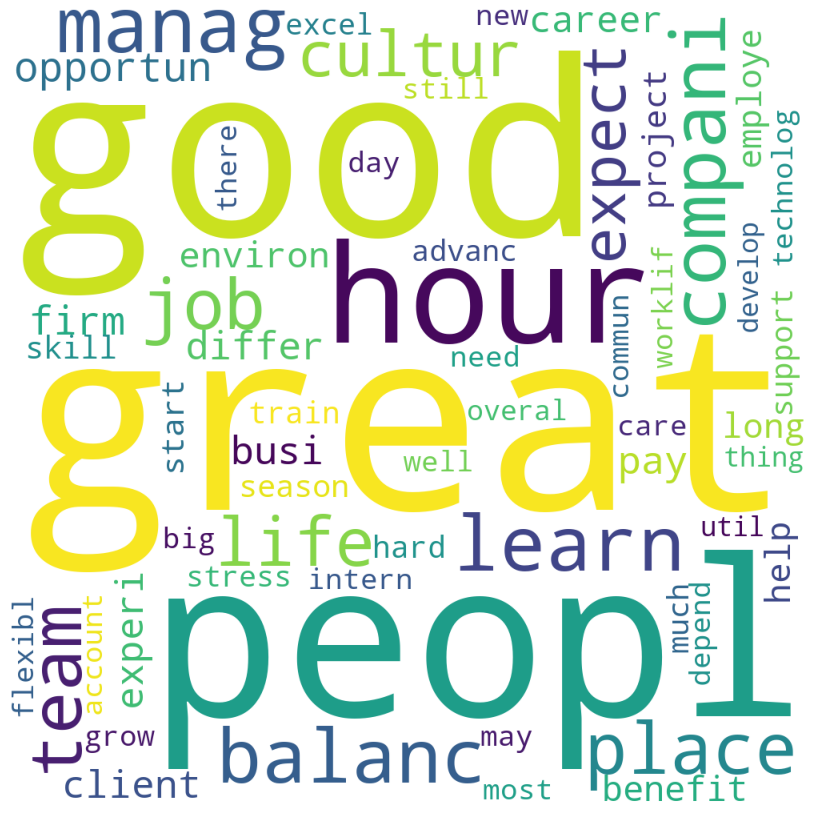

KPMG


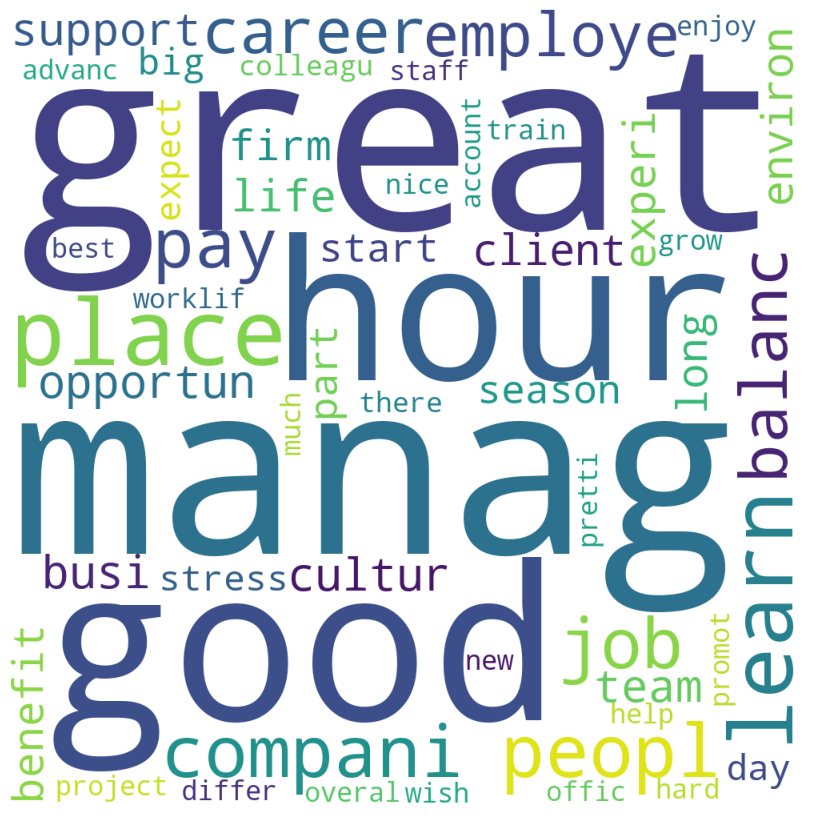

In [19]:
del company
for company in dtmr:
 print(company)
 create_wordcloud(dtmr[company])

Deloitte


c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


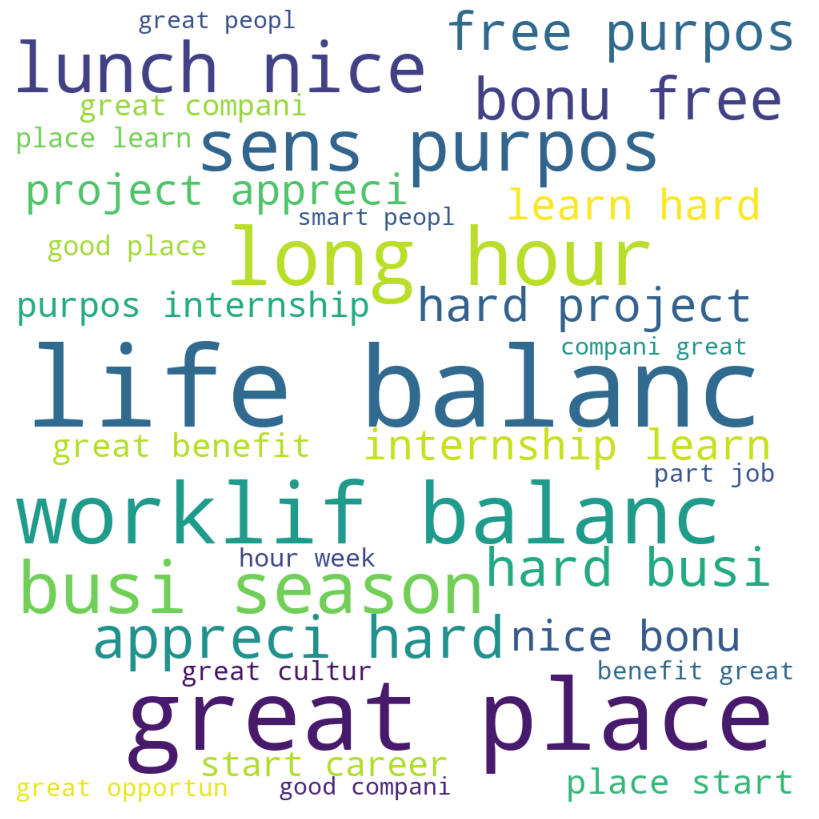

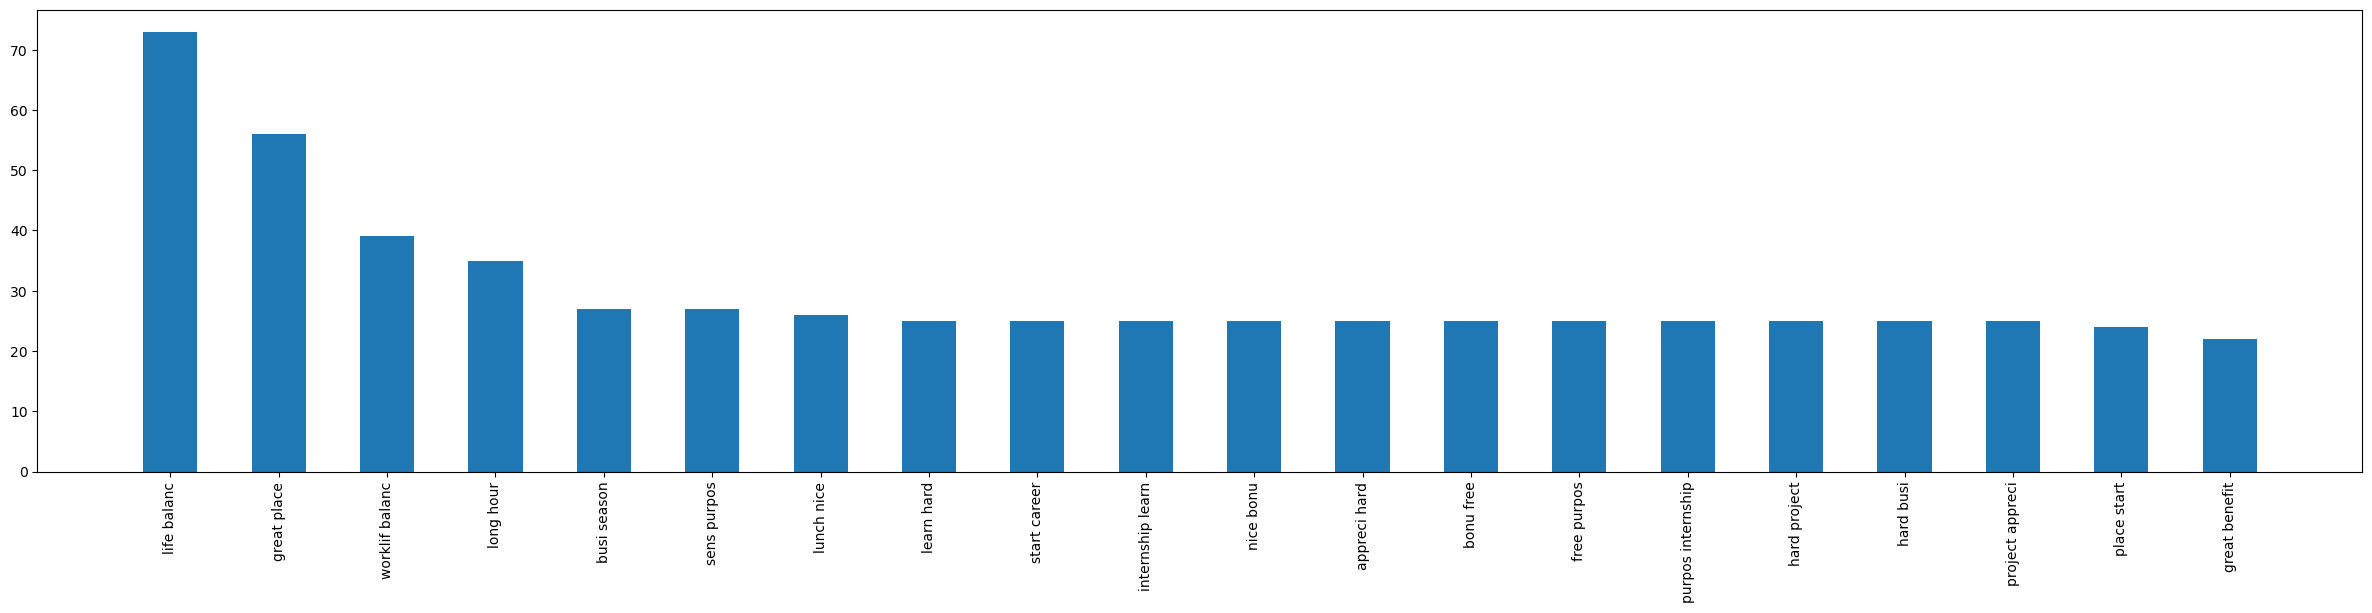

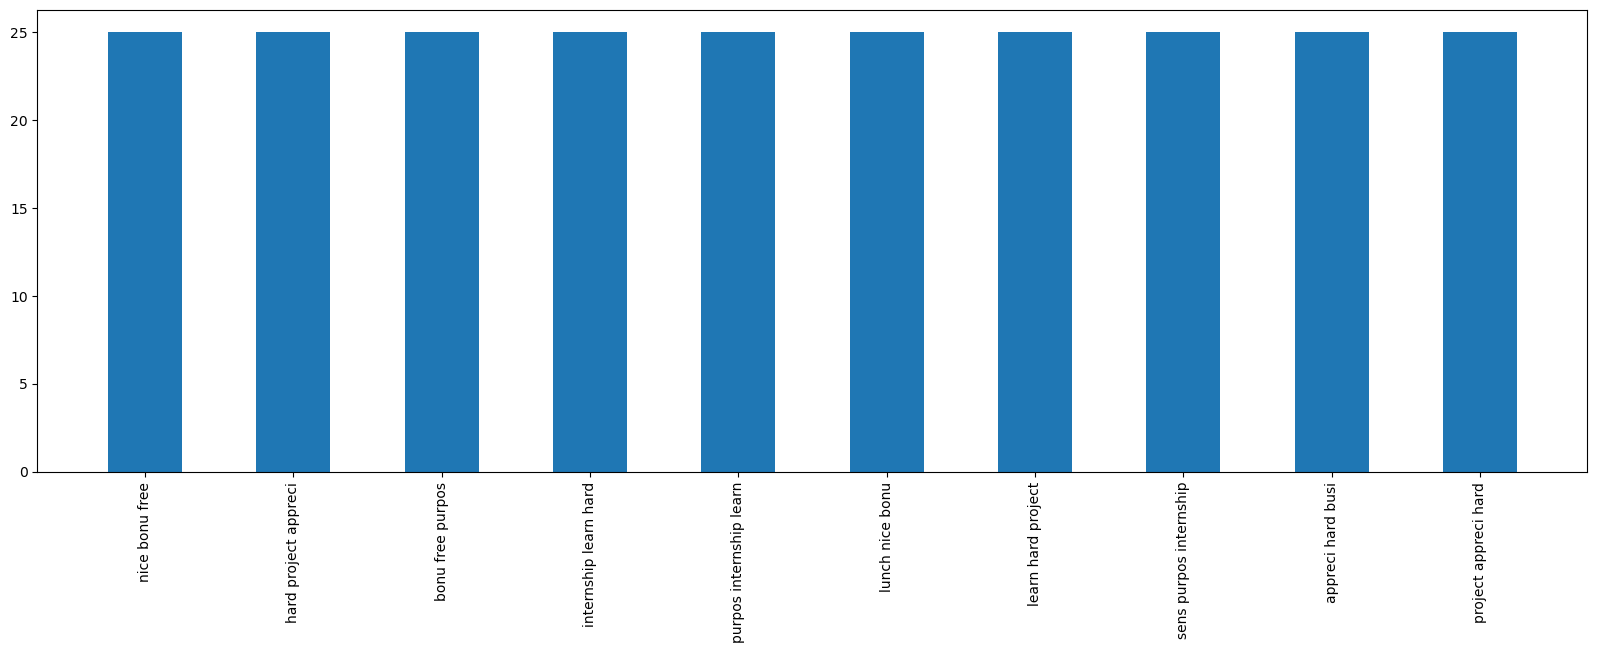

Accenture


c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


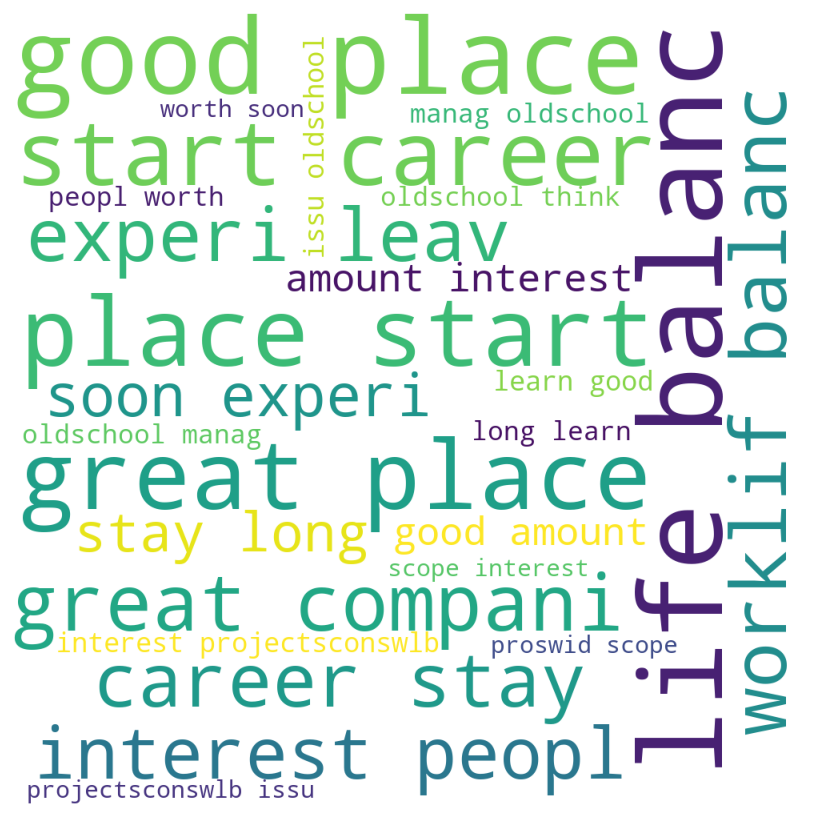

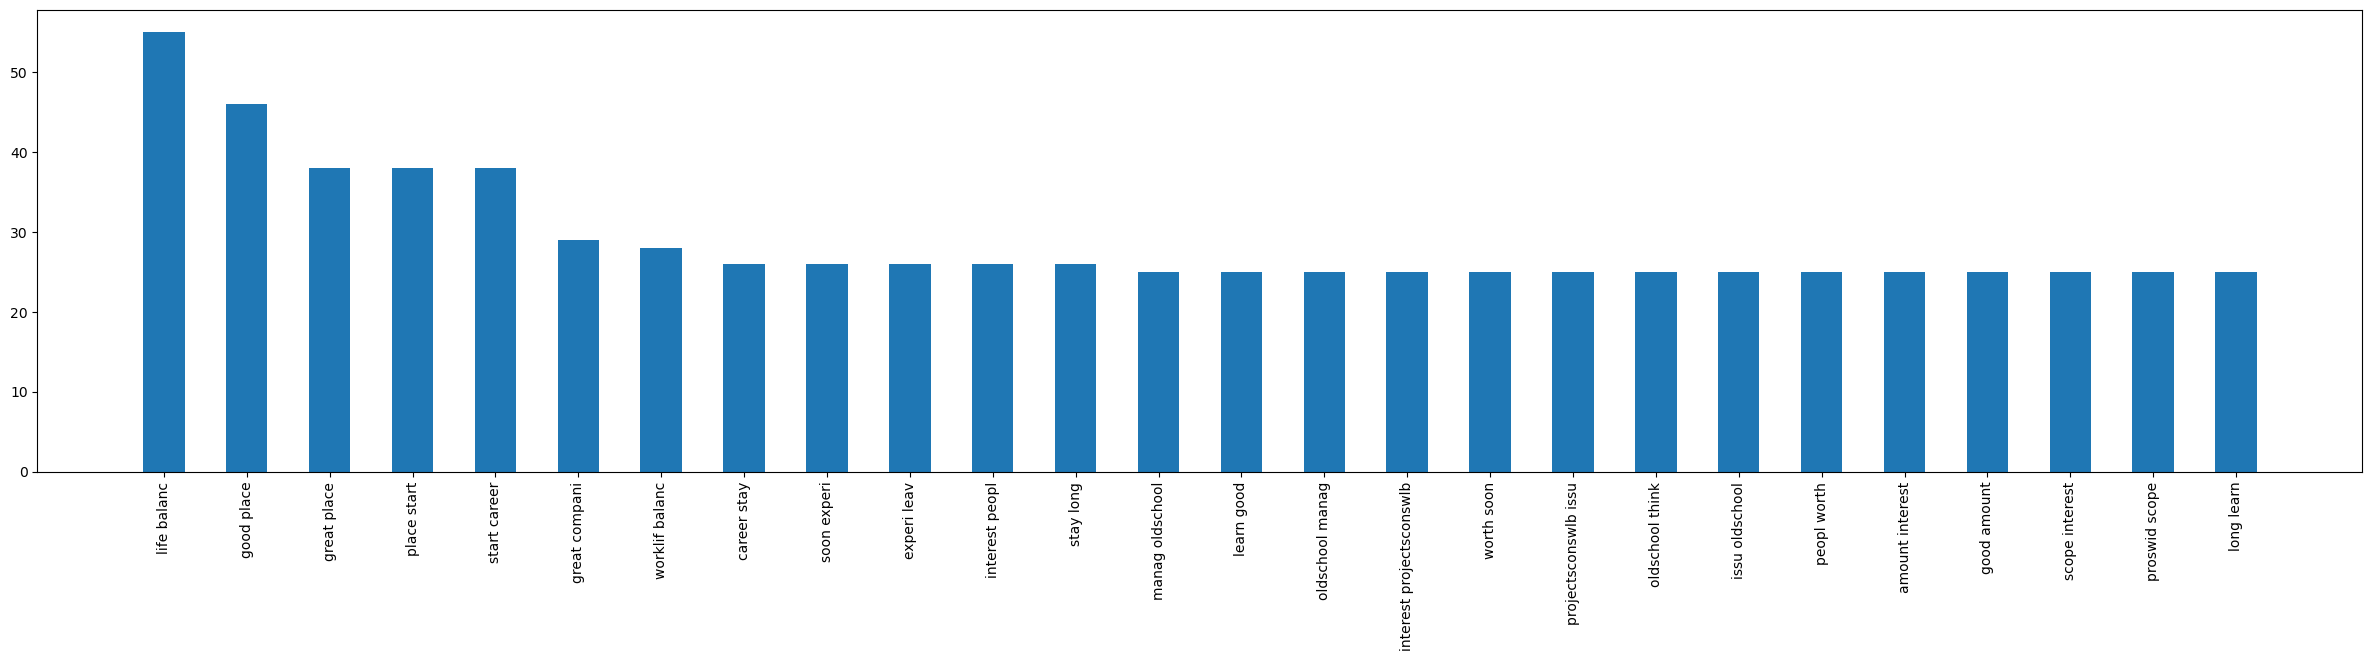

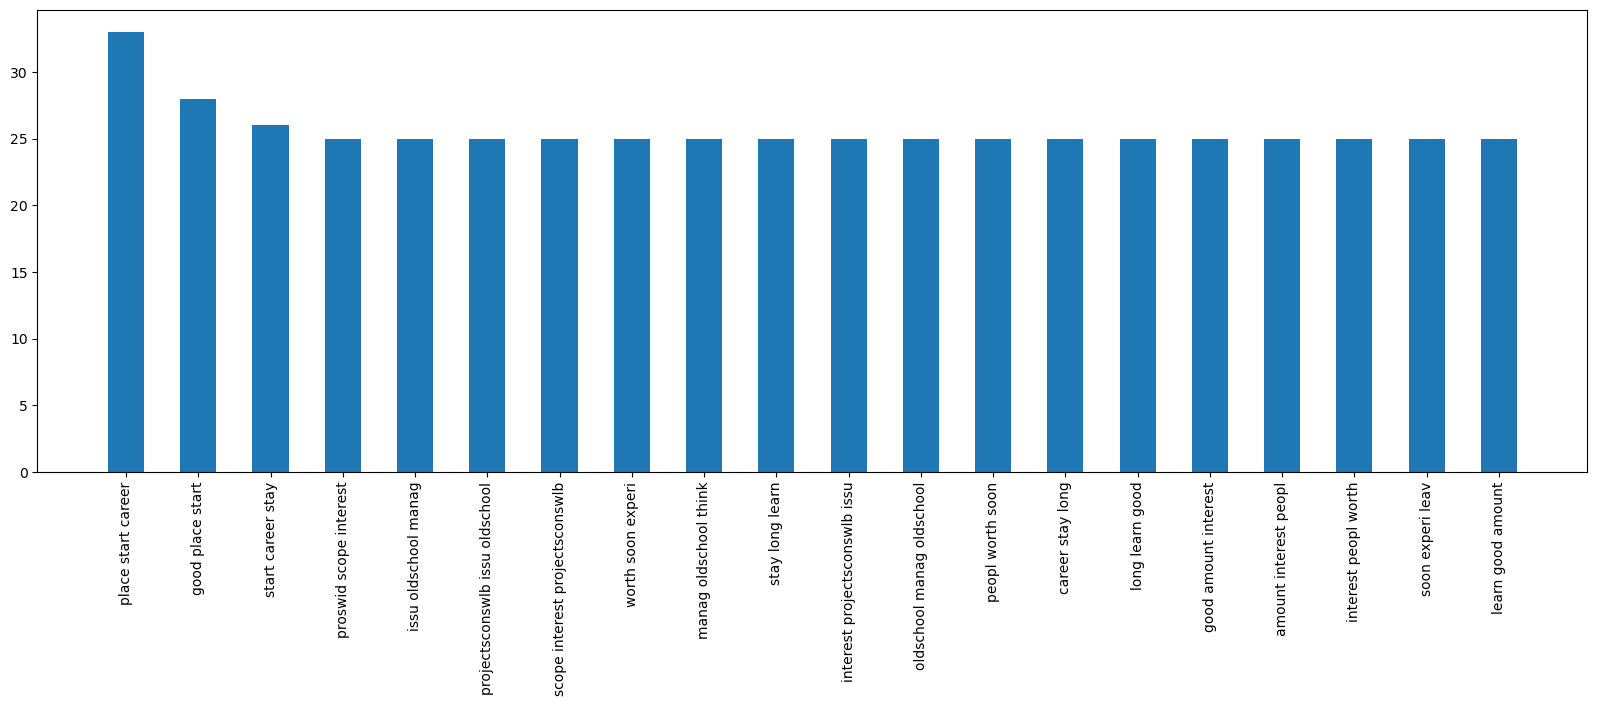

EY


c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


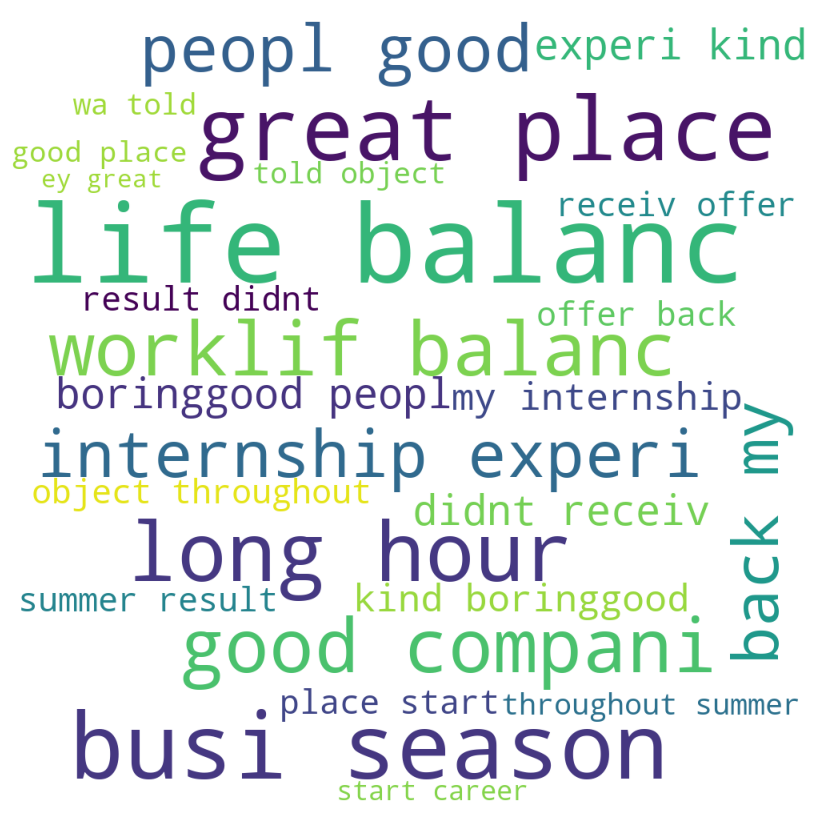

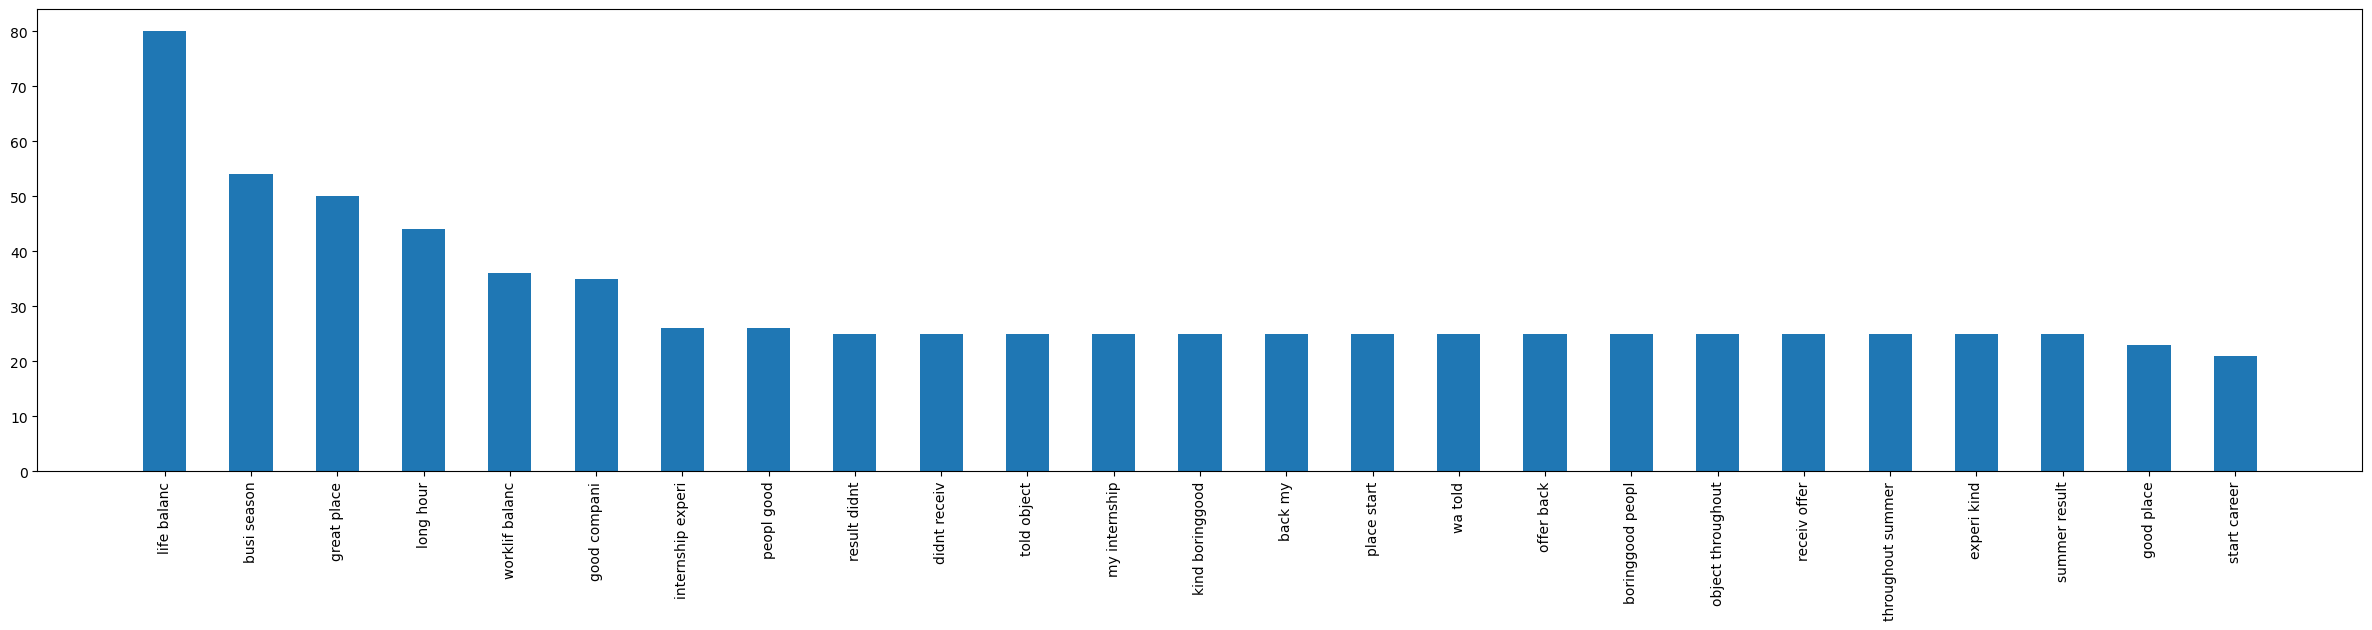

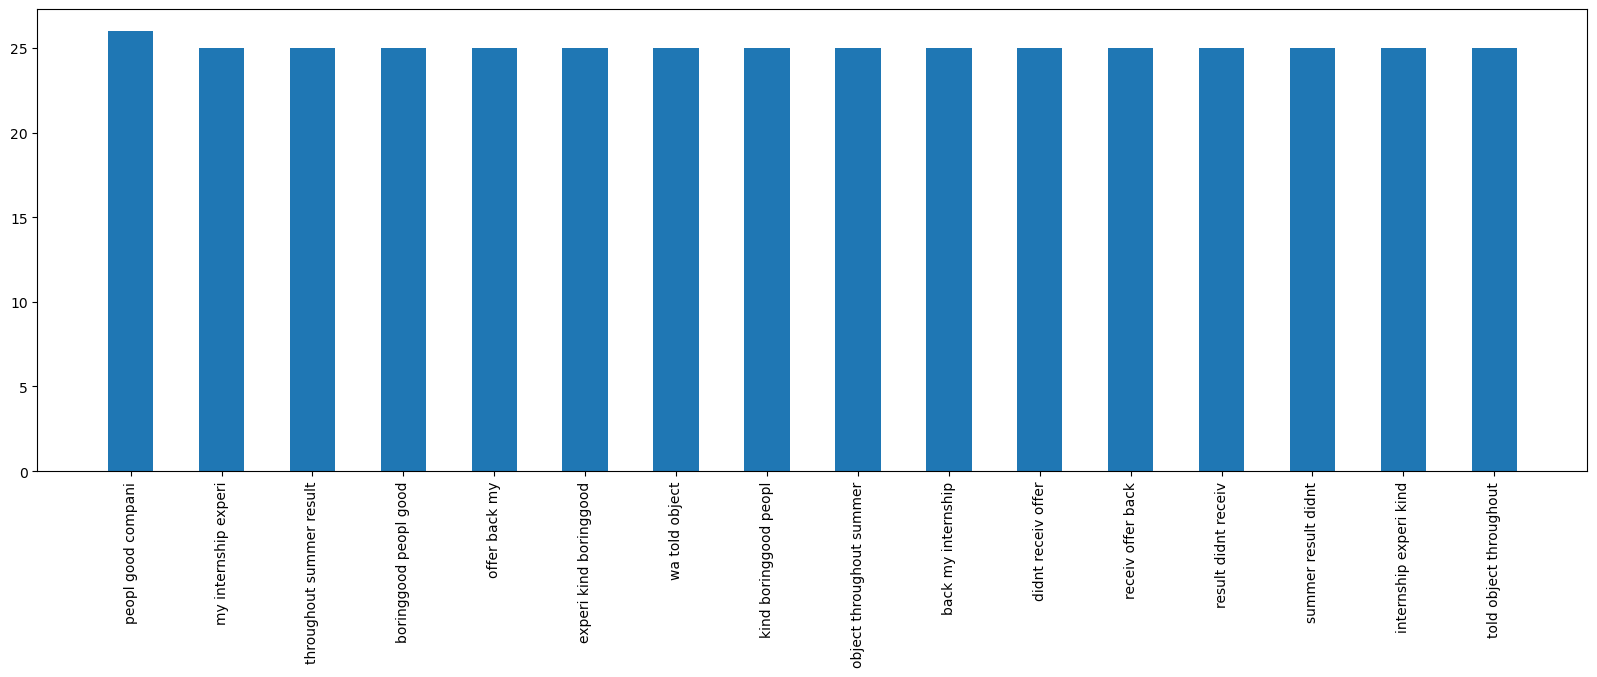

Pwc


c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


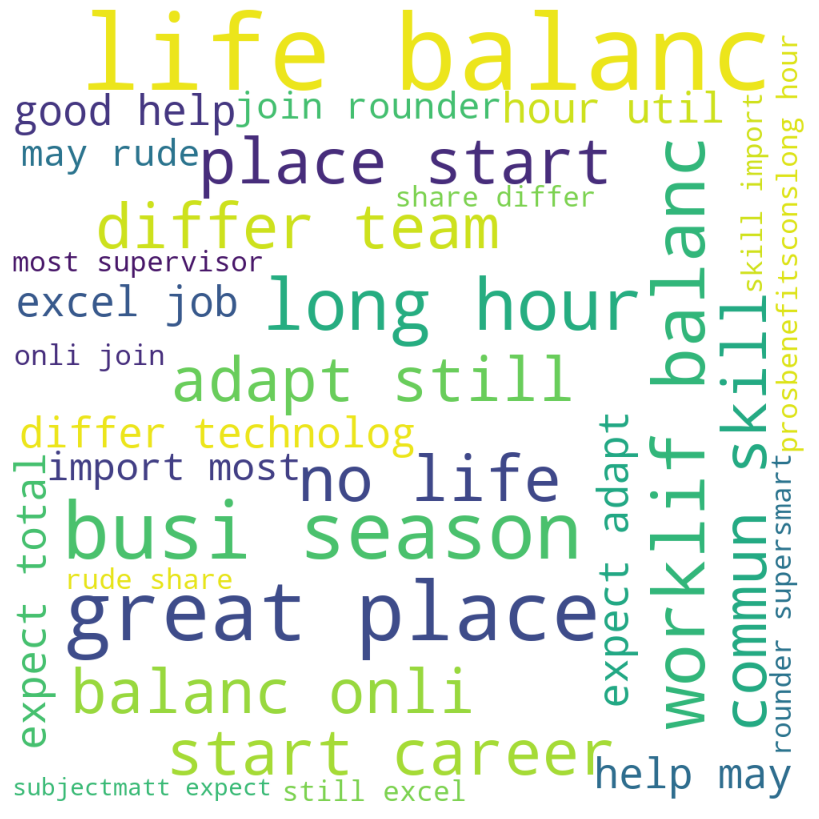

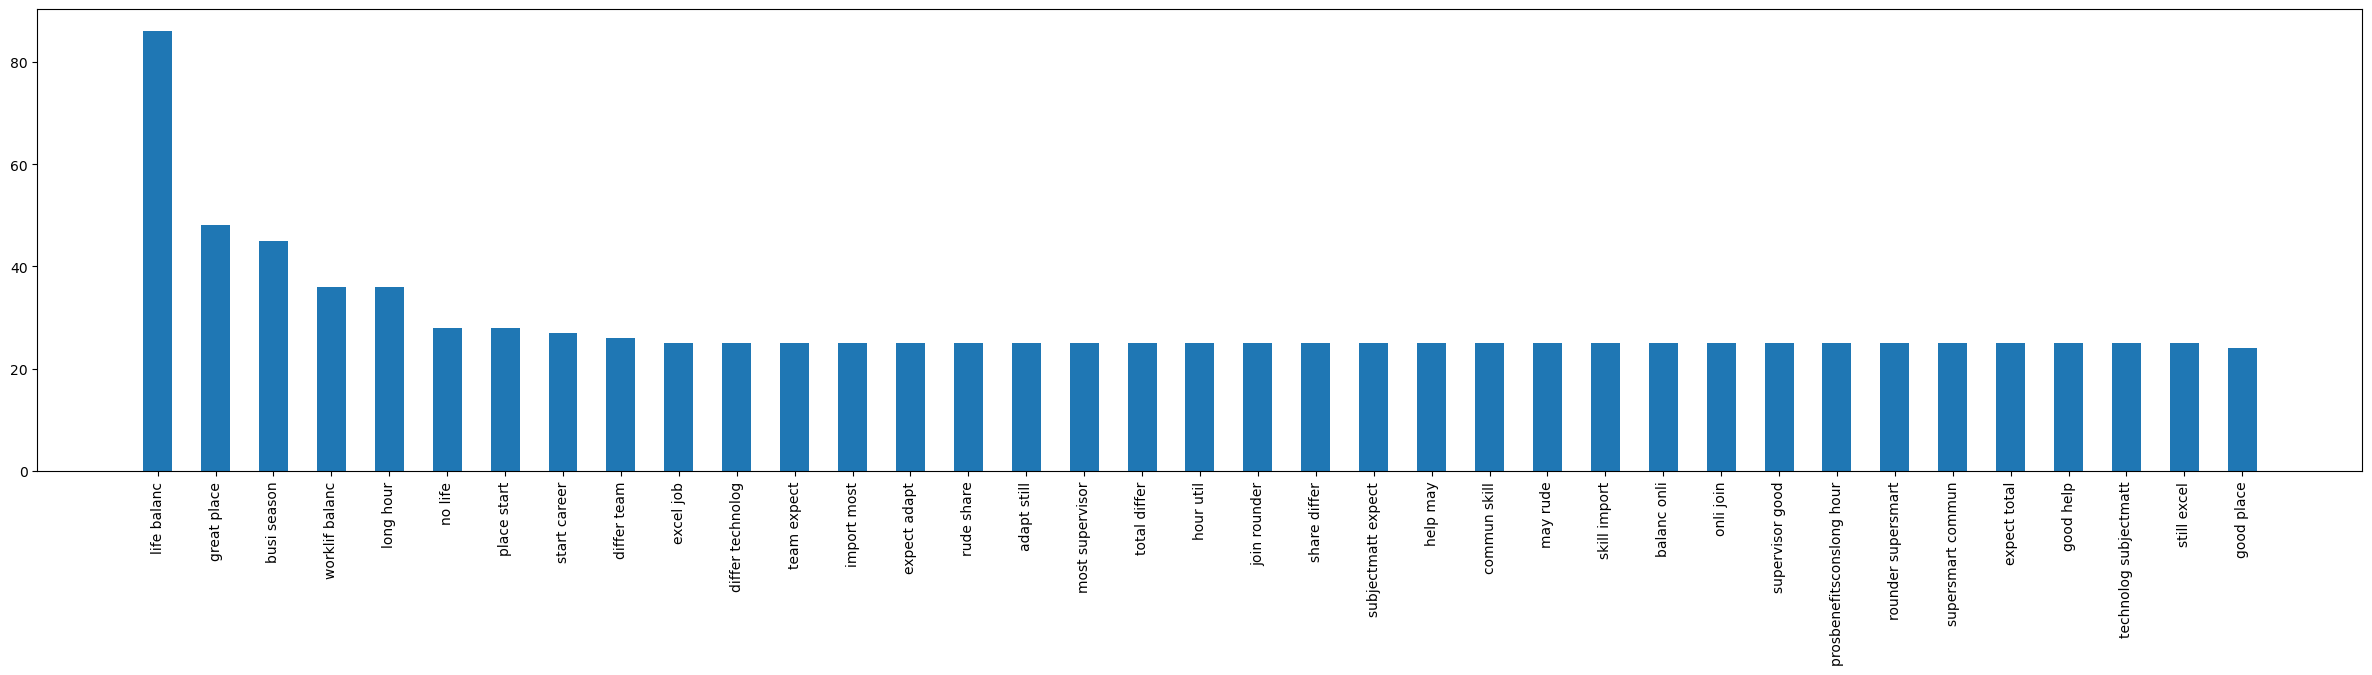

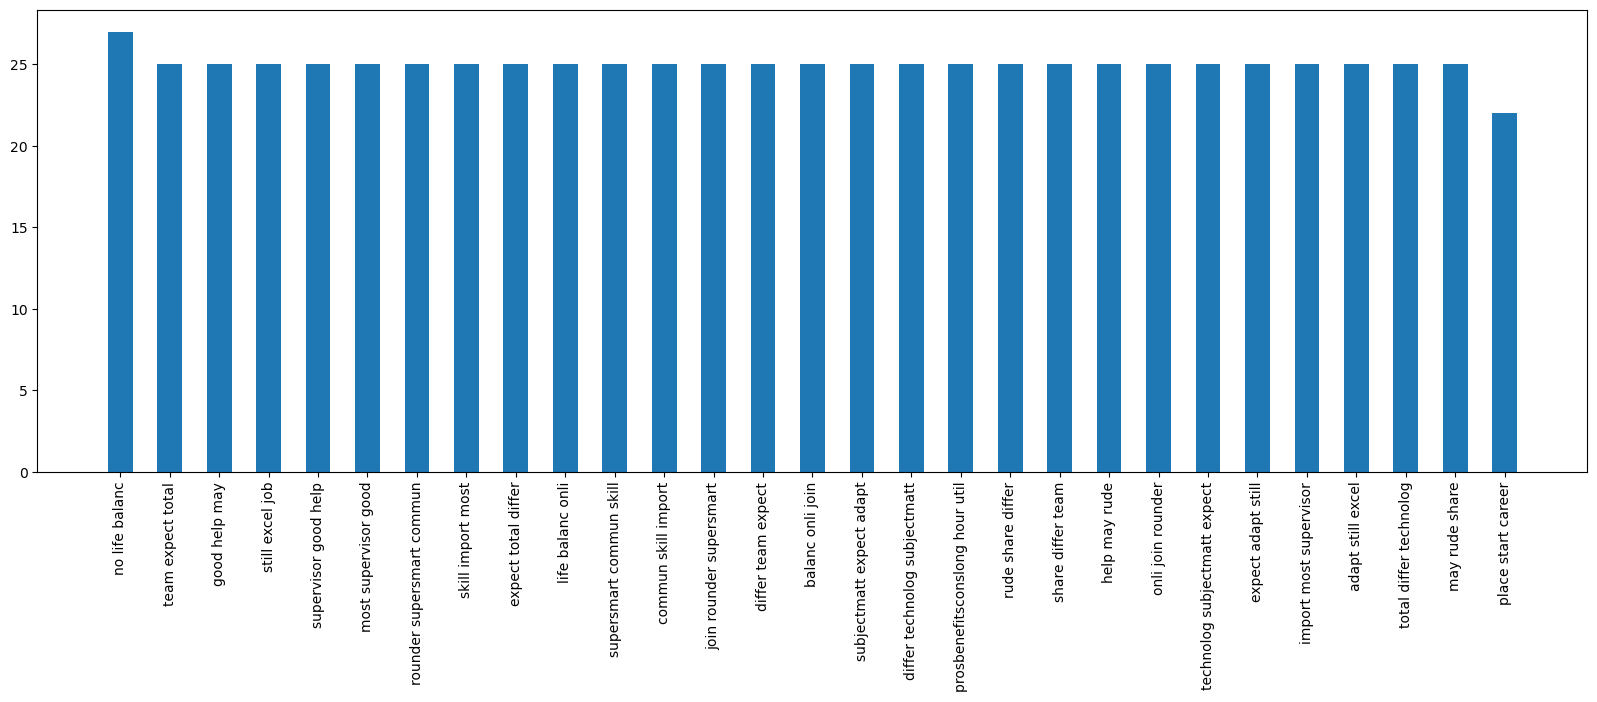

KPMG


c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jedrek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


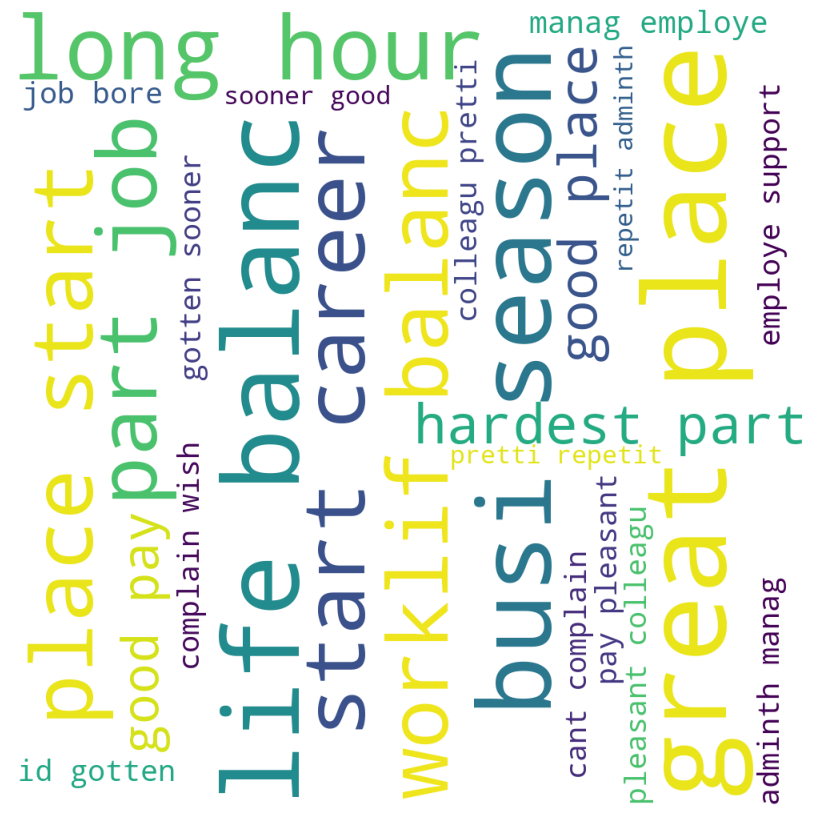

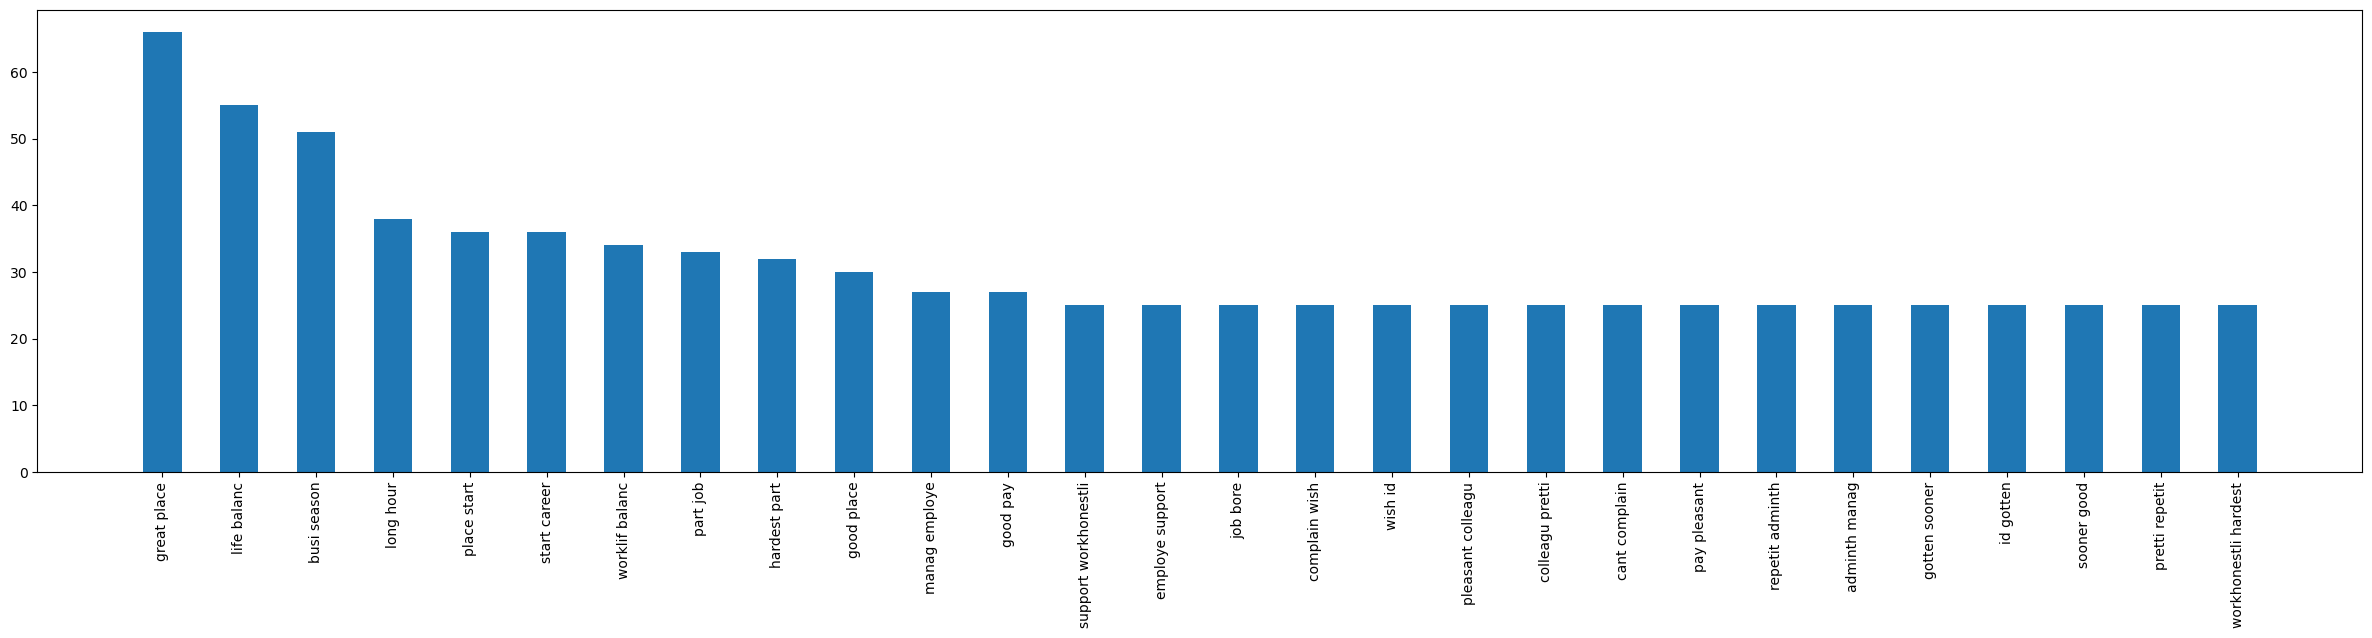

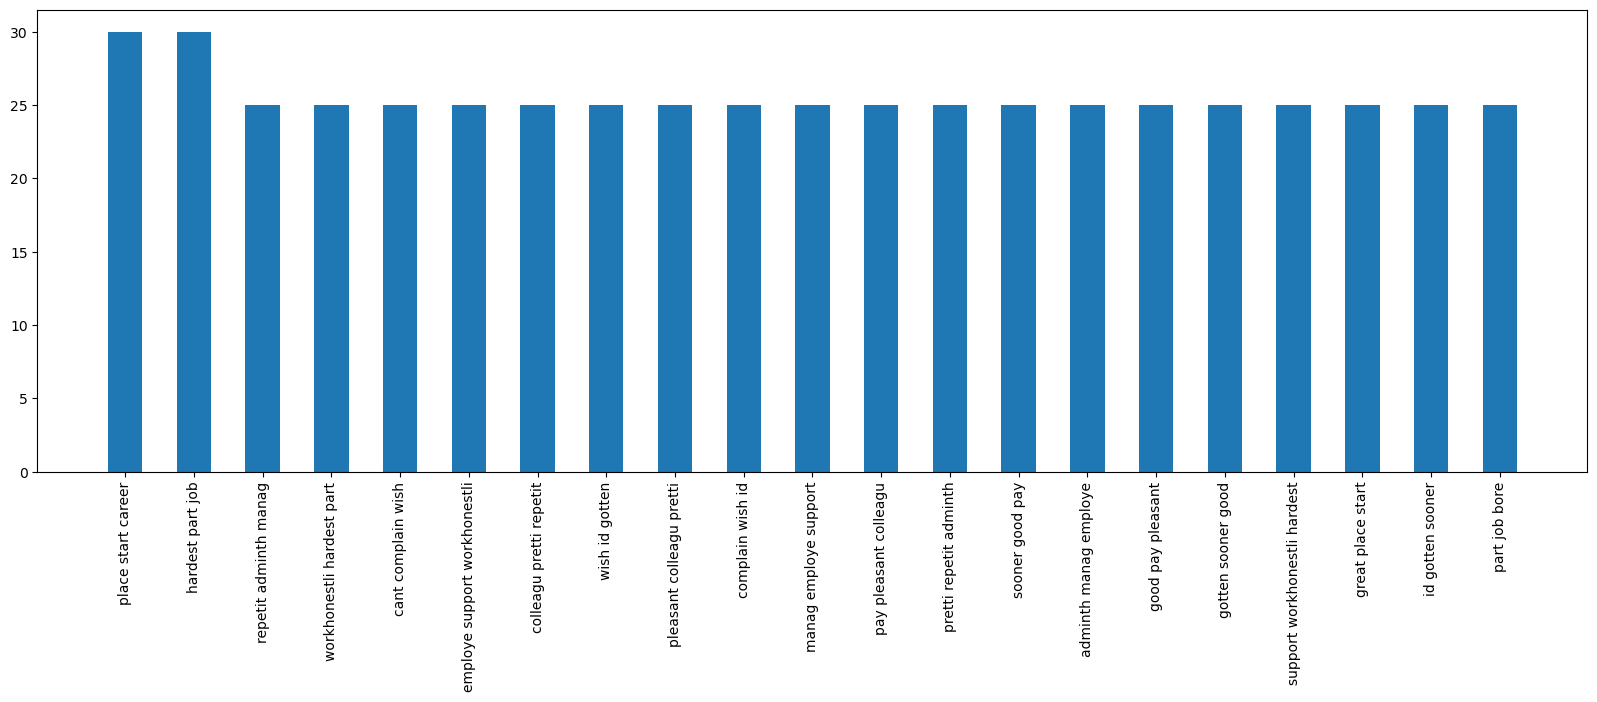

In [22]:
threshold = 20
#bi-grams
del company
for company in dtmr:
    print(company)
    vectorizer = CountVectorizer(ngram_range=(2,2))
    dtm_bi = vectorizer.fit_transform(Reviews[company])
    dtm_bi = pd.DataFrame(dtm_bi.toarray(), columns=vectorizer.get_feature_names())

    freqr_bi = dtm_bi.sum(axis=0)
    freqr_bi = freqr_bi.sort_values(ascending=False)

    mask = freqr_bi >= threshold
    freqr_bi = freqr_bi.drop(labels=freqr_bi[~mask].index)
    #print(freqr_bi)

    # feature_names = vectorizer.get_feature_names()
    # frequencies = dtm_bi.sum(axis=0).tolist()[0]
    # bi_grams = dict(zip(feature_names, frequencies))


    # sorted_bi_grams = sorted(bi_grams.items(), key=lambda x: x[1], reverse=True)

    # for bi_gram, frequency in sorted_bi_grams:
    #   if frequency > threshold:
    #     print(f'{bi_gram}: {frequency}')

    # Finding most frequent tri-grams
    vectorizer = CountVectorizer(ngram_range=(3,3))
    dtm_tri = vectorizer.fit_transform(Reviews[company])
    dtm_tri = pd.DataFrame(dtm_tri.toarray(), columns=vectorizer.get_feature_names())

    freqr_tri = dtm_tri.sum(axis=0)
    freqr_tri = freqr_tri.sort_values(ascending=False)
    mask = freqr_tri >= threshold
    freqr_tri = freqr_tri.drop(labels=freqr_tri[~mask].index)

    
    create_wordcloud(dtm_bi)
    plt.figure(figsize=(30, 6))
    plt.bar(freqr_bi.index, freqr_bi.values,width = 0.5)
    plt.xticks(rotation='vertical')
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.bar(freqr_tri.index, freqr_tri.values, width=0.5)
    plt.xticks(rotation='vertical')
    plt.show()

Deloitte


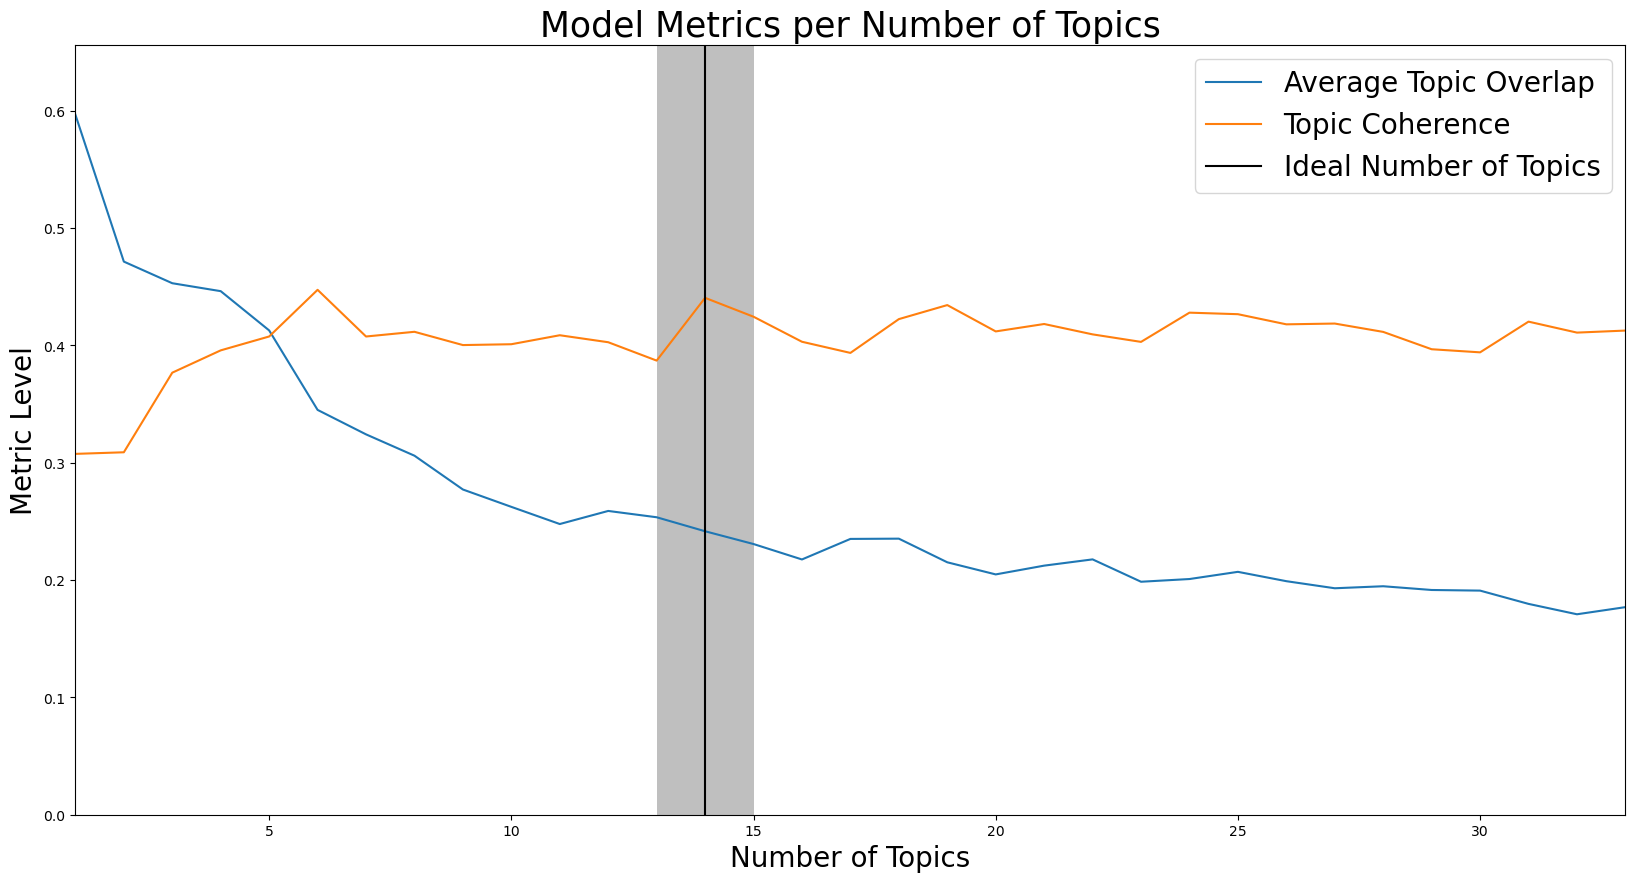

Accenture


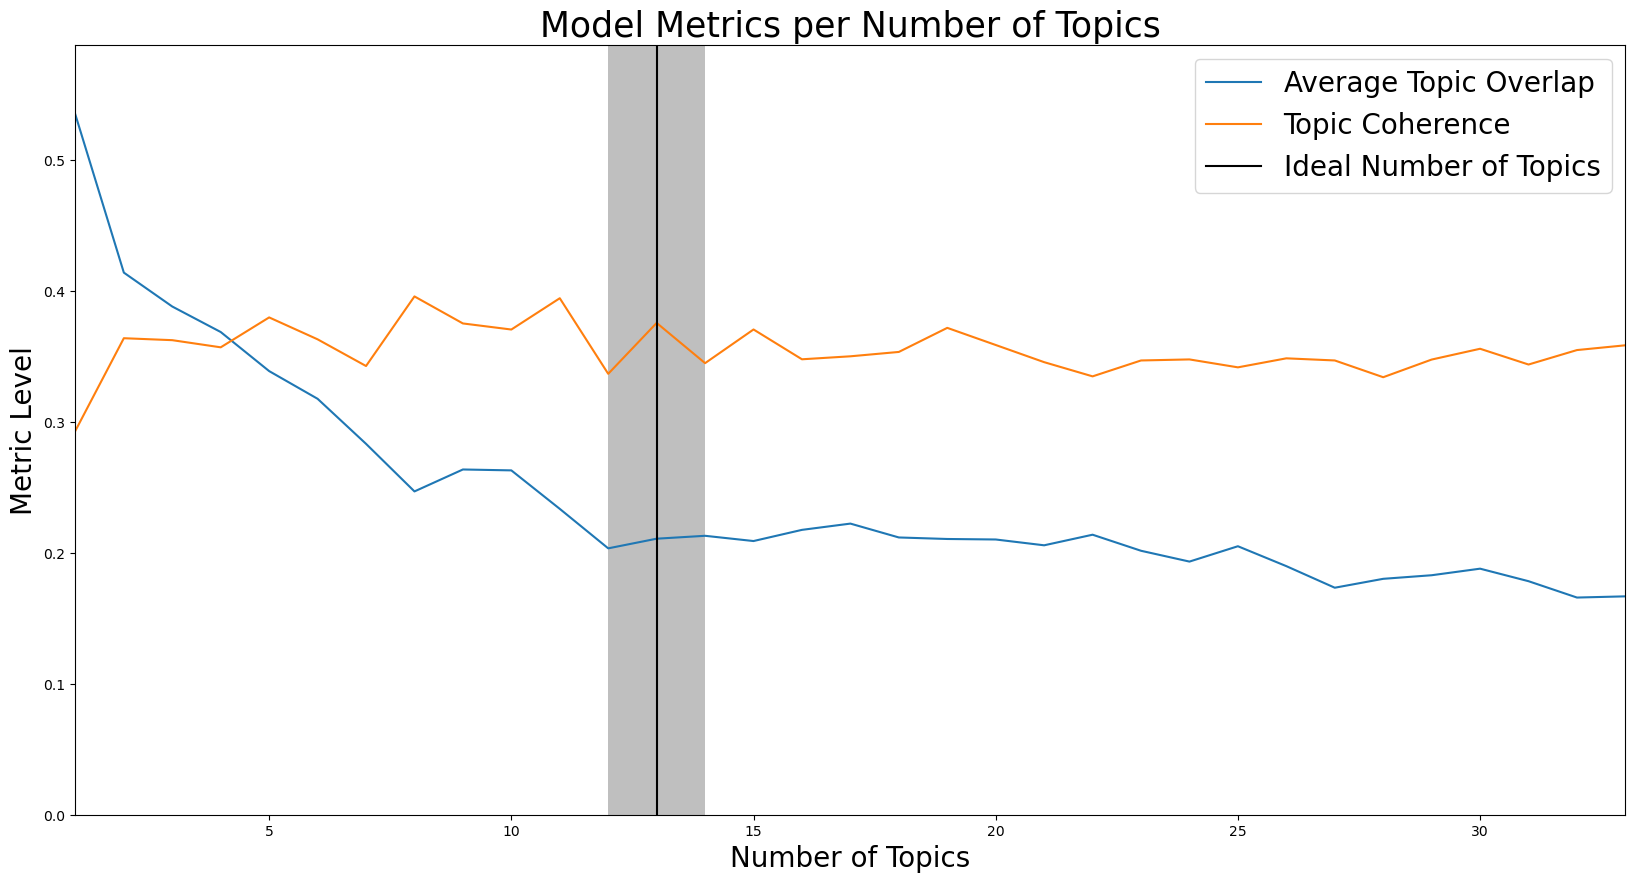

EY


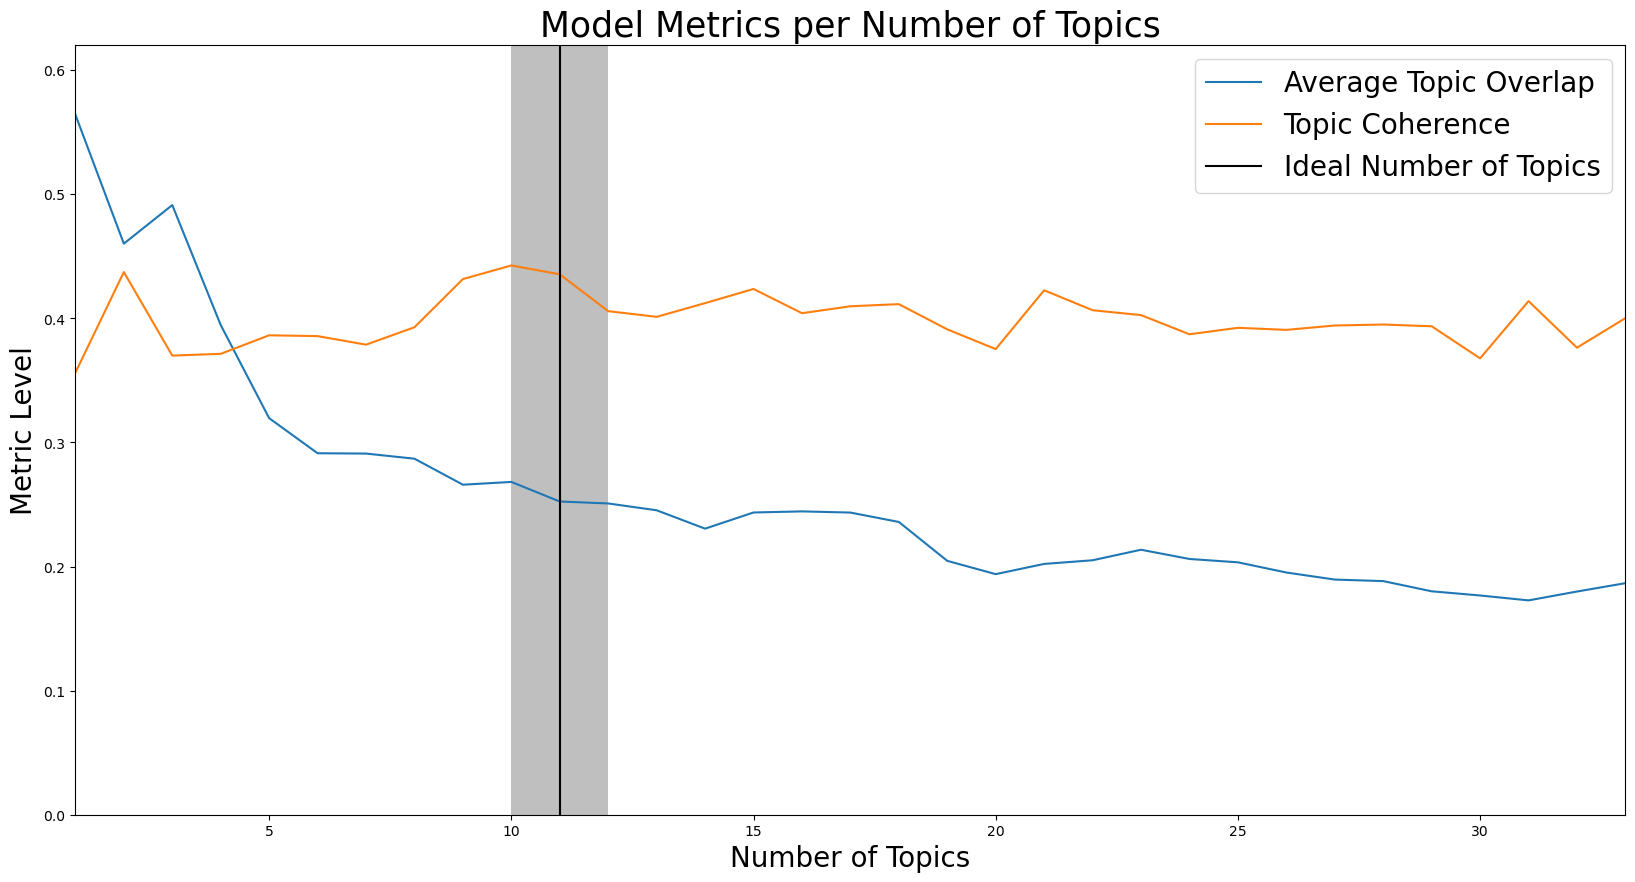

Pwc


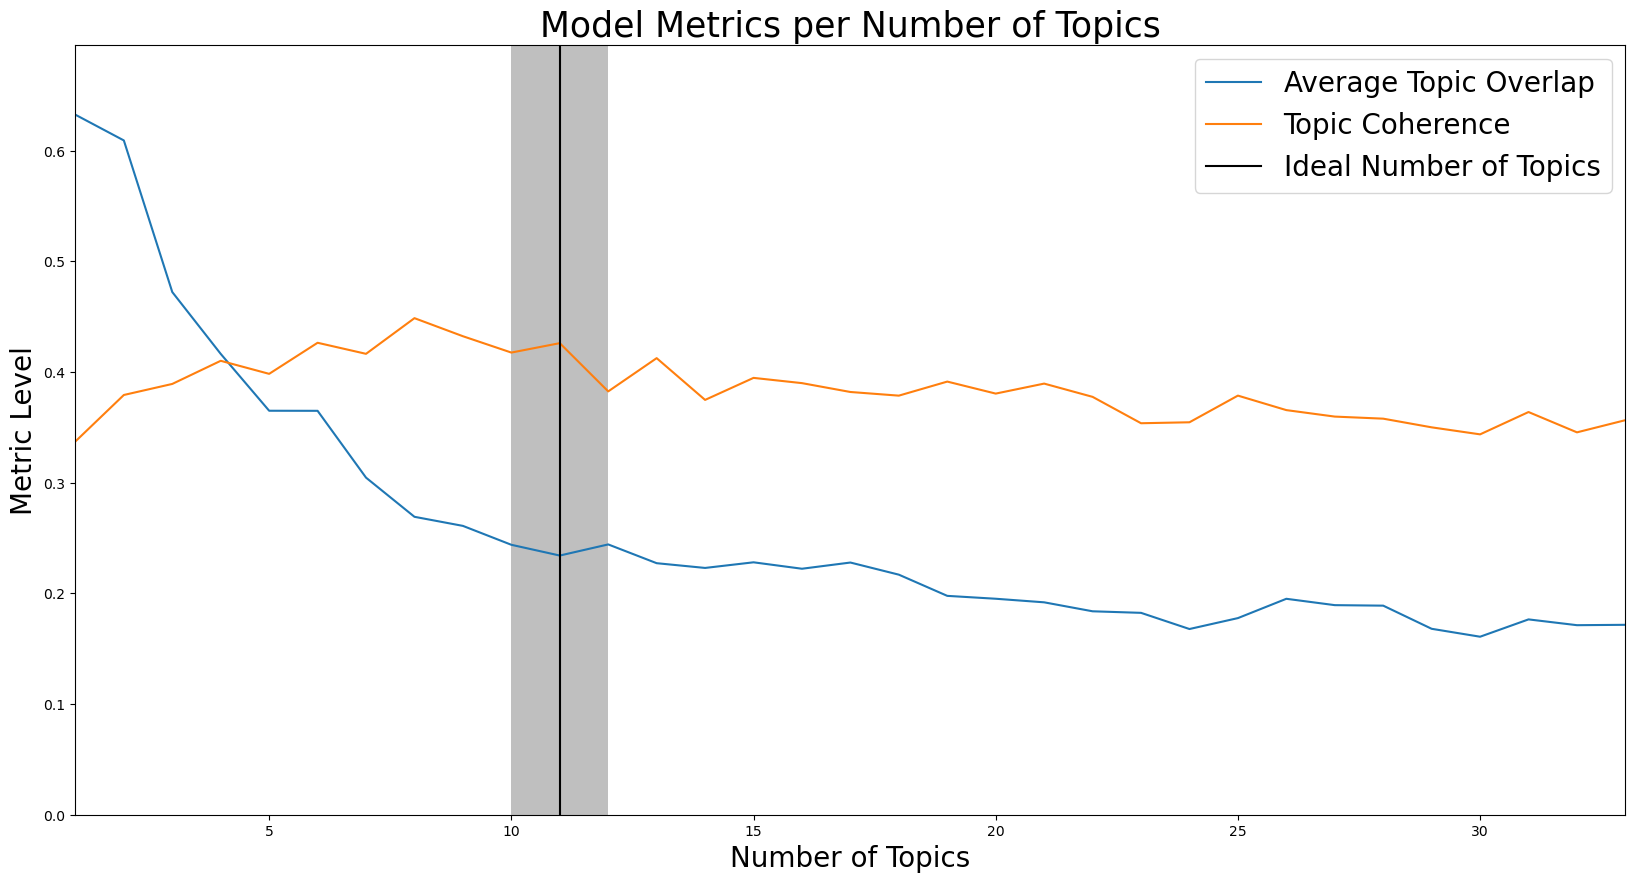

KPMG


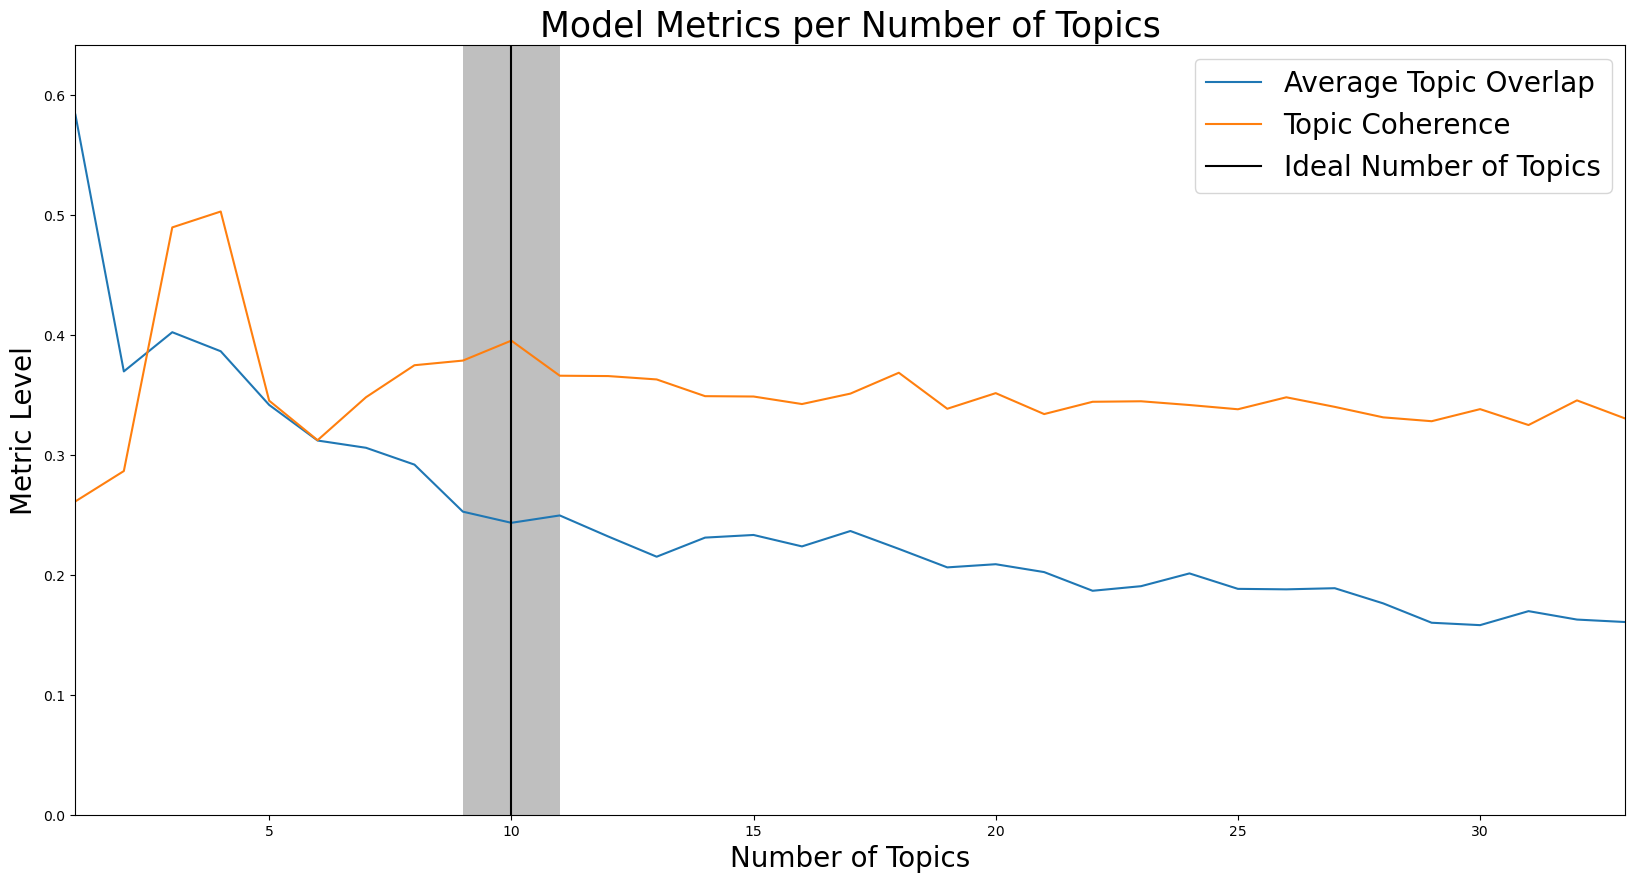

In [42]:
#Find optimal number of topicv 
del company
for company in dtmr:
    print(company)
    tokens = [s.split() for s in Reviews[company]]

    dirichlet_dict = corpora.Dictionary(tokens)
    bow_corpus = [dirichlet_dict.doc2bow(text) for text in tokens]
    num_topics = list(range(35)[1:])
    num_keywords = 15

    LDA_models = {}
    LDA_topics = {}
    for i in num_topics:
        LDA_models[i] = LdaModel(corpus=bow_corpus,
                                id2word=dirichlet_dict,
                                num_topics=i,
                                update_every=1,
                                chunksize=len(bow_corpus),
                                passes=20,
                                alpha='auto',
                                random_state=42)

        shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                                num_words=num_keywords,
                                                formatted=False)
        LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

    def jaccard_similarity(topic_1, topic_2):
        """
        Derives the Jaccard similarity of two topics

        Jaccard similarity:
        - A statistic used for comparing the similarity and diversity of sample sets
        - J(A,B) = (A ∩ B)/(A ∪ B)
        - Goal is low Jaccard scores for coverage of the diverse elements
        """
        intersection = set(topic_1).intersection(set(topic_2))
        union = set(topic_1).union(set(topic_2))
                        
        return float(len(intersection))/float(len(union))

    LDA_stability = {}
    for i in range(0, len(num_topics)-1):
        jaccard_sims = []
        for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
            sims = []
            for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
                sims.append(jaccard_similarity(topic1, topic2))    
            
            jaccard_sims.append(sims)    
        
        LDA_stability[num_topics[i]] = jaccard_sims
                    
    mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

    coherences = [CoherenceModel(model=LDA_models[i], texts=tokens, dictionary=dirichlet_dict, coherence='c_v').get_coherence()\
                for i in num_topics[:-1]]

    coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
    coh_sta_max = max(coh_sta_diffs)
    coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
    ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
    ideal_topic_num = num_topics[ideal_topic_num_index]


    plt.figure(figsize=(20,10))
    ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
    ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

    ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
    ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

    y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
    ax.set_ylim([0, y_max])
    ax.set_xlim([1, num_topics[-1]-1])
                    
    ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
    ax.set_ylabel('Metric Level', fontsize=20)
    ax.set_xlabel('Number of Topics', fontsize=20)
    plt.legend(fontsize=20)
    plt.show() 


In [55]:
del LDA_models
LDA_models = {
    'Deloitte':[],
    'Accenture':[],
    'Pwc':[],
    'EY':[],
    'KPMG':[]
    }

numOfTopics = { 'Deloitte': 14, 'Accenture': 13, 'Pwc':11,'EY':11,'KPMG':10}
for company in dtmr:
    print(company)
    tokens = [s.split() for s in Reviews[company]]

    dirichlet_dict = corpora.Dictionary(tokens)
    bow_corpus = [dirichlet_dict.doc2bow(text) for text in tokens]
    num_topics = list(range(35)[1:])
    LDA_models[company] = LdaModel(corpus=bow_corpus,
                                    id2word=dirichlet_dict,
                                    num_topics=numOfTopics[company],
                                    update_every=1,
                                    chunksize=len(bow_corpus),
                                    passes=20,
                                    alpha='auto',
                                    random_state=42)

Deloitte
Accenture
EY
Pwc
KPMG


In [64]:
LDA_models['Deloitte'].print_topics(num_topics=numOfTopics['Deloitte'], num_words=15)

[(0,
  '0.023*"great" + 0.016*"learn" + 0.015*"cultur" + 0.011*"peopl" + 0.009*"opportun" + 0.009*"good" + 0.009*"firm" + 0.009*"project" + 0.008*"profession" + 0.008*"balanc" + 0.007*"expect" + 0.007*"busi" + 0.007*"well" + 0.007*"experi" + 0.007*"career"'),
 (1,
  '0.013*"hour" + 0.012*"manag" + 0.011*"project" + 0.008*"team" + 0.008*"oper" + 0.008*"firm" + 0.008*"hire" + 0.007*"everi" + 0.006*"benefit" + 0.006*"anoth" + 0.006*"varieti" + 0.006*"support" + 0.005*"consult" + 0.005*"great" + 0.005*"health"'),
 (2,
  '0.014*"place" + 0.013*"peopl" + 0.012*"day" + 0.011*"cultur" + 0.008*"balanc" + 0.008*"project" + 0.008*"there" + 0.007*"compani" + 0.007*"career" + 0.007*"great" + 0.006*"part" + 0.006*"best" + 0.006*"manag" + 0.006*"littl" + 0.006*"help"'),
 (3,
  '0.014*"hour" + 0.012*"manag" + 0.012*"compani" + 0.012*"consult" + 0.011*"network" + 0.010*"project" + 0.009*"good" + 0.008*"interest" + 0.008*"learn" + 0.008*"prosgreat" + 0.007*"environ" + 0.007*"pay" + 0.007*"job" + 0.006*"

In [65]:
LDA_models['Pwc'].print_topics(num_topics=numOfTopics['Pwc'], num_words=15)

[(0,
  '0.011*"opportun" + 0.011*"good" + 0.011*"learn" + 0.009*"project" + 0.008*"hour" + 0.008*"manag" + 0.008*"pay" + 0.008*"team" + 0.007*"client" + 0.007*"role" + 0.006*"less" + 0.006*"compani" + 0.006*"leav" + 0.006*"peopl" + 0.006*"advanc"'),
 (1,
  '0.041*"great" + 0.026*"learn" + 0.025*"place" + 0.017*"peopl" + 0.016*"compani" + 0.016*"opportun" + 0.013*"career" + 0.012*"good" + 0.012*"grow" + 0.011*"develop" + 0.011*"firm" + 0.009*"start" + 0.009*"manag" + 0.009*"cultur" + 0.009*"profession"'),
 (2,
  '0.020*"good" + 0.020*"firm" + 0.017*"balanc" + 0.016*"compani" + 0.016*"great" + 0.015*"learn" + 0.015*"manag" + 0.013*"experi" + 0.013*"employe" + 0.013*"peopl" + 0.012*"life" + 0.008*"consult" + 0.008*"hour" + 0.008*"team" + 0.006*"cultur"'),
 (3,
  '0.023*"balanc" + 0.023*"busi" + 0.022*"season" + 0.020*"peopl" + 0.018*"great" + 0.012*"life" + 0.011*"benefit" + 0.011*"hour" + 0.010*"worklif" + 0.010*"month" + 0.010*"place" + 0.009*"need" + 0.008*"environ" + 0.007*"good" + 0.

In [66]:
LDA_models['Accenture'].print_topics(num_topics=numOfTopics['Accenture'], num_words=15)

[(0,
  '0.019*"project" + 0.015*"manag" + 0.015*"peopl" + 0.014*"compani" + 0.010*"career" + 0.009*"need" + 0.009*"great" + 0.008*"team" + 0.008*"balanc" + 0.008*"support" + 0.008*"opportun" + 0.008*"learn" + 0.007*"good" + 0.007*"depend" + 0.007*"there"'),
 (1,
  '0.025*"part" + 0.020*"what" + 0.017*"project" + 0.016*"cultur" + 0.015*"good" + 0.015*"compani" + 0.014*"stress" + 0.012*"manag" + 0.011*"best" + 0.010*"help" + 0.010*"job" + 0.009*"peopl" + 0.009*"assign" + 0.008*"client" + 0.008*"develop"'),
 (2,
  '0.062*"oldschool" + 0.040*"manag" + 0.033*"interest" + 0.033*"issu" + 0.032*"scope" + 0.031*"think" + 0.010*"great" + 0.009*"project" + 0.007*"pay" + 0.007*"balanc" + 0.007*"team" + 0.007*"good" + 0.006*"peopl" + 0.006*"excel" + 0.006*"advanc"'),
 (3,
  '0.021*"team" + 0.016*"job" + 0.011*"balanc" + 0.011*"manag" + 0.010*"project" + 0.010*"day" + 0.009*"care" + 0.009*"peopl" + 0.008*"role" + 0.007*"life" + 0.007*"compani" + 0.007*"opportun" + 0.007*"promot" + 0.006*"stress" + 0

In [67]:
LDA_models['KPMG'].print_topics(num_topics=numOfTopics['KPMG'], num_words=15)

[(0,
  '0.016*"hour" + 0.016*"learn" + 0.014*"account" + 0.014*"manag" + 0.013*"firm" + 0.011*"place" + 0.010*"public" + 0.008*"pay" + 0.008*"go" + 0.008*"life" + 0.007*"support" + 0.007*"busi" + 0.007*"often" + 0.007*"long" + 0.006*"peopl"'),
 (1,
  '0.021*"learn" + 0.017*"compani" + 0.015*"opportun" + 0.013*"place" + 0.011*"if" + 0.010*"good" + 0.009*"environ" + 0.009*"employe" + 0.009*"grow" + 0.008*"there" + 0.008*"peopl" + 0.008*"fast" + 0.008*"help" + 0.008*"team" + 0.008*"great"'),
 (2,
  '0.025*"great" + 0.021*"best" + 0.018*"manag" + 0.011*"what" + 0.011*"place" + 0.011*"compani" + 0.010*"cultur" + 0.009*"environ" + 0.008*"part" + 0.008*"famili" + 0.008*"employe" + 0.008*"day" + 0.007*"experi" + 0.007*"opportun" + 0.006*"need"'),
 (3,
  '0.017*"hour" + 0.013*"pay" + 0.011*"great" + 0.010*"manag" + 0.010*"peopl" + 0.009*"compani" + 0.009*"day" + 0.008*"busi" + 0.007*"learn" + 0.007*"job" + 0.006*"long" + 0.006*"good" + 0.006*"thing" + 0.005*"team" + 0.005*"train"'),
 (4,
  '0.0

In [68]:
LDA_models['EY'].print_topics(num_topics=numOfTopics['EY'], num_words=15)

[(0,
  '0.019*"great" + 0.018*"good" + 0.017*"peopl" + 0.013*"place" + 0.011*"client" + 0.011*"manag" + 0.011*"firm" + 0.011*"ey" + 0.011*"team" + 0.011*"hour" + 0.010*"learn" + 0.010*"job" + 0.009*"experi" + 0.009*"opportun" + 0.008*"pay"'),
 (1,
  '0.017*"ey" + 0.012*"great" + 0.010*"good" + 0.010*"compani" + 0.010*"help" + 0.009*"learn" + 0.009*"manag" + 0.009*"hour" + 0.008*"environ" + 0.008*"benefit" + 0.008*"im" + 0.008*"place" + 0.008*"peopl" + 0.007*"cultur" + 0.006*"need"'),
 (2,
  '0.033*"experi" + 0.020*"good" + 0.019*"compani" + 0.018*"peopl" + 0.018*"back" + 0.018*"offer" + 0.018*"ey" + 0.017*"internship" + 0.016*"throughout" + 0.016*"receiv" + 0.015*"my" + 0.015*"told" + 0.014*"summer" + 0.014*"object" + 0.014*"didnt"'),
 (3,
  '0.014*"hour" + 0.011*"manag" + 0.011*"balanc" + 0.011*"good" + 0.011*"job" + 0.011*"differ" + 0.009*"peopl" + 0.009*"part" + 0.009*"best" + 0.008*"life" + 0.008*"learn" + 0.007*"expect" + 0.006*"engag" + 0.006*"stress" + 0.006*"depend"'),
 (4,
  '